In [1]:
import pandas as pd
import numpy as np
import os 
from tqdm import tqdm

In [5]:
# pull in the data from folders
master_df = pd.DataFrame()
for folder in os.listdir('/Users/rorypearson/Desktop/harness_db/raw_rise_data_history/'):
    if folder not in ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
                              '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 
                              '2021', '2022', '2023', '2024', '2025']:
            continue
    # if folder not in ['2021']:
    #     continue
    for sub_folder in tqdm(os.listdir(f'/Users/rorypearson/Desktop/harness_db/raw_rise_data_history/{folder}'), desc=f'Processing {folder}'):
        if sub_folder not in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
            continue
        for file in os.listdir(f'/Users/rorypearson/Desktop/harness_db/raw_rise_data_history/{folder}/{sub_folder}'):
            if file.endswith('.json'):
                try:
                    df = pd.read_json(f'/Users/rorypearson/Desktop/harness_db/raw_rise_data_history/{folder}/{sub_folder}/{file}')
                
                    if df.shape[0] > 0 and master_df.shape[0] == 0:
                        master_df = df
                    elif df.shape[0] > 0:
                        master_df = pd.concat([master_df, df])
                    else:
                        print(f'{file} is empty')
                except Exception as e:
                    print(f'{file} is empty? {e}')

print(master_df.shape)

Processing 2025: 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

(482, 20)


In [5]:
# master_df.to_csv('master_df.csv', index=False)
# master_df = pd.read_csv('master_df.csv', low_memory=False)

In [6]:
master_df['date'] = pd.to_datetime(master_df['scheduledDate'])
master_df.date

# make a list of missing dates since the first date in the dataset
missing_dates = pd.date_range(start=master_df['date'].min(), end=master_df['date'].max())
missing_dates = missing_dates[~missing_dates.isin(master_df['date'])]
missing_dates

# make a dataframe of the missing dates

/var/folders/tt/f70p_py12jb4_mtykrl8flth0000gn/T/ipykernel_45037/555038243.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  master_df['date'] = pd.to_datetime(master_df['scheduledDate'])


DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [7]:
_df = master_df.explode('racesAPI').reset_index(drop=True)
print(_df.shape)
_df.head()

(3167, 21)


,club,clubId,dayNightTwilight,driversAvailableTime,featureRaceText,lastUpdatedTime,lateScratchingTime,meetingClass,meetingCode,meetingStage,...,numberOfRaces,scheduledDate,scheduledDateAsISO8601,state,tab,track,trackId,trials,racesAPI,date
0,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,7,20/04/2025,2025-04-20,VIC,True,Echuca,851869C7E8B736D1E055005E00000019,False,"{'ageRestriction': '', 'ageSexDescription': ''...",2025-04-20
1,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,7,20/04/2025,2025-04-20,VIC,True,Echuca,851869C7E8B736D1E055005E00000019,False,"{'ageRestriction': '', 'ageSexDescription': ''...",2025-04-20
2,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,7,20/04/2025,2025-04-20,VIC,True,Echuca,851869C7E8B736D1E055005E00000019,False,"{'ageRestriction': '', 'ageSexDescription': ''...",2025-04-20
3,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,7,20/04/2025,2025-04-20,VIC,True,Echuca,851869C7E8B736D1E055005E00000019,False,"{'ageRestriction': '', 'ageSexDescription': ''...",2025-04-20
4,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,7,20/04/2025,2025-04-20,VIC,True,Echuca,851869C7E8B736D1E055005E00000019,False,"{'ageRestriction': '', 'ageSexDescription': ''...",2025-04-20


In [8]:
normalized = pd.json_normalize(_df['racesAPI'])
df_norm = pd.concat([_df.drop(columns=['racesAPI']), normalized], axis=1)

print(df_norm.shape)
df_norm.head()

(3167, 66)


,club,clubId,dayNightTwilight,driversAvailableTime,featureRaceText,lastUpdatedTime,lateScratchingTime,meetingClass,meetingCode,meetingStage,...,raceClassRestriction,raceCode,raceNumber,raceStatus,stakes,startType,startTypeWord,stateBred,trackCondition,resultAPI
0,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,NR 38 to 44.,ECC20042504,1,Accepted,5000.0,MS,Mobile,,GOOD,"[{'age': 6, 'barrier': 'Fr1', 'beatenMargin': ..."
1,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,NR up to 37.,ECC20042505,2,Accepted,5000.0,MS,Mobile,,GOOD,"[{'age': 7, 'barrier': 'Fr4', 'beatenMargin': ..."
2,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,MAIDEN,ECC20042506,3,NoRace,6000.0,MS,Mobile,,GOOD,"[{'age': 5, 'barrier': 'Fr1', 'beatenMargin': ..."
3,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,No NR.,ECC20042507,4,Accepted,6000.0,SS,Stand,,GOOD,"[{'age': 7, 'barrier': '20 Fr2', 'beatenMargin..."
4,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,NR up to 60.,ECC20042501,5,Accepted,8000.0,MS,Mobile,,GOOD,"[{'age': 5, 'barrier': 'Sr4', 'beatenMargin': ..."


In [9]:
df_norm = df_norm.loc[:, ~df_norm.columns.duplicated()]

_df2 = df_norm.explode('resultAPI').reset_index(drop=True)
print(_df2.shape)
_df2.head()

(27417, 65)


,club,clubId,dayNightTwilight,driversAvailableTime,featureRaceText,lastUpdatedTime,lateScratchingTime,meetingClass,meetingCode,meetingStage,...,raceClassRestriction,raceCode,raceNumber,raceStatus,stakes,startType,startTypeWord,stateBred,trackCondition,resultAPI
0,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,NR 38 to 44.,ECC20042504,1,Accepted,5000.0,MS,Mobile,,GOOD,"{'age': 6, 'barrier': 'Fr1', 'beatenMargin': '..."
1,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,NR 38 to 44.,ECC20042504,1,Accepted,5000.0,MS,Mobile,,GOOD,"{'age': 6, 'barrier': 'Sr1', 'beatenMargin': '..."
2,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,NR 38 to 44.,ECC20042504,1,Accepted,5000.0,MS,Mobile,,GOOD,"{'age': 12, 'barrier': 'Fr2', 'beatenMargin': ..."
3,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,NR 38 to 44.,ECC20042504,1,Accepted,5000.0,MS,Mobile,,GOOD,"{'age': 6, 'barrier': 'Sr3', 'beatenMargin': '..."
4,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,NR 38 to 44.,ECC20042504,1,Accepted,5000.0,MS,Mobile,,GOOD,"{'age': 5, 'barrier': 'Sr5', 'beatenMargin': '..."


In [10]:
normalized = pd.json_normalize(_df2['resultAPI'])
df_norm2 = pd.concat([_df2.drop(columns=['resultAPI']), normalized], axis=1)

print(df_norm2.shape)
df_norm2.head()

(27417, 125)


,club,clubId,dayNightTwilight,driversAvailableTime,featureRaceText,lastUpdatedTime,lateScratchingTime,meetingClass,meetingCode,meetingStage,...,trainerDOB,trainerGender,trainerId,trainerInitials,trainerLastName,trainerName,trainerNameShort,trainerPreferredName,trainerTitle,trotterInPacersRace
0,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,1962-07-05,M,851869BB636136D1E055005E00000019,P G,Bull,Glenn Bull,P G Bull,Glenn,Mr,False
1,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,1947-01-05,M,851869BB449036D1E055005E00000019,J,Costa,Joe Costa,J Costa,Joe,Mr,False
2,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,1975-06-12,M,851869BC2B8936D1E055005E00000019,J P,Quinlan,Jeremy Quinlan,J P Quinlan,Jeremy,Mr,False
3,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,1970-05-19,M,851869BB24FE36D1E055005E00000019,K M,Watson,Mark Watson,K M Watson,Mark,Mr,False
4,Echuca,851869BBB06336D1E055005E00000019,N,2025-04-17T11:00:00+10:00,,2025-04-28T14:02:28+10:00,2025-04-20T08:30:00+10:00,C-CLASS,EC200425,RESULTS,...,1969-03-12,M,851869C1231E36D1E055005E00000019,M L,McMahon,Mick McMahon,M L McMahon,Mick,Mr,False


NEW DB MANAGEMENT FROM HERE ON

In [3]:
# df_norm2.to_csv('collapsed_df.csv', index=False)
df = pd.read_csv('collapsed_df.csv', low_memory=False)

In [51]:
df = pd.read_csv('harness_historical.csv')
df.head()

/var/folders/tt/f70p_py12jb4_mtykrl8flth0000gn/T/ipykernel_45037/4036256274.py:1: DtypeWarning: Columns (19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('harness_historical.csv')


,Unnamed: 0,club,clubId,dayNightTwilight,driversAvailableTime,featureRaceText,meetingClass,meetingCode,meetingStage,meetingStatus,...,stewardsCommentsLong,stewardsCommentsShort,trainerDOB,trainerGender,trainerId,trainerName,trainerTitle,trotterInPacersRace,bsp,preplay_last_price_taken
0,0,St Marys,851869BBDE6F36D1E055005E00000019,D,2003-12-29 22:00:00+00:00,Country Guineas\r\nColin White Memorial\r\nSca...,C-CLASS,SM010104,RESULTS,PLANNED,...,"Tire, Behind leader at the bell",PRS TIRE 2,1976-05-18 00:00:00+00:00,M,851869C0E10336D1E055005E00000019,Wayne Watson,Mr,False,NaN,NaN
1,1,King Island,851869BBC3CC36D1E055005E00000019,D,2003-12-29 22:00:00+00:00,NaN,B-CLASS,KS010104,RESULTS,PLANNED,...,NaN,NaN,1942-09-24 00:00:00+00:00,M,851869C0C03836D1E055005E00000019,John Rhodes,Mr,False,NaN,NaN
2,2,St Marys,851869BBDE6F36D1E055005E00000019,D,2003-12-29 22:00:00+00:00,Country Guineas\r\nColin White Memorial\r\nSca...,C-CLASS,SM010104,RESULTS,PLANNED,...,"Slow out., Leader at the bell",SO 1,1932-04-22 00:00:00+00:00,M,851869C0B49736D1E055005E00000019,Brian Lewis,Mr,False,NaN,NaN
3,3,Penrith,851869BF185636D1E055005E00000019,N,2003-12-29 05:00:00+00:00,NaN,C-CLASS,PE010104,RESULTS,COMPLETED,...,NaN,NaN,1960-10-14 00:00:00+00:00,M,851869BE581036D1E055005E00000019,Leon Conquest,Mr,False,7.0,NaN
4,4,Busselton,851869C0181536D1E055005E00000019,N,2003-12-30 01:00:00+00:00,NaN,C-CLASS,BU010104,RESULTS,PLANNED,...,"slowly out, raced roughly, hung in under pressure",SO RR HIUP,1961-01-20 00:00:00+00:00,F,851869C000F136D1E055005E00000019,Diane Reeves,Mrs,False,10.0,10.0


In [52]:
df_temp

,club,clubId,dayNightTwilight,driversAvailableTime,featureRaceText,meetingClass,meetingCode,meetingStage,meetingStatus,numberOfRaces,...,stewardsCommentsLong,stewardsCommentsShort,trainerDOB,trainerGender,trainerId,trainerName,trainerTitle,trotterInPacersRace,bsp,preplay_last_price_taken
0,Mildura,851869BC49C936D1E055005E00000019,N,2025-03-29 00:00:00+00:00,,C-CLASS,ML010425,RESULTS,PLANNED,8.0,...,"gate speed, withstood challenge, led, leader a...",GS WC L 1 SOUP D/F,1966-12-14,M,851869BD284736D1E055005E00000019,Brendan Tune,Mr,False,25.59,25.59
1,Albion Park,851869BC7AFC36D1E055005E00000019,N,2025-03-30 23:00:00+00:00,,C-CLASS,AP010425,RESULTS,PLANNED,8.0,...,"beaten for speed, hopple shorteners failed to ...",BFS SFTR 5 GG VXAR NSF,1968-05-01,M,851869BD2D6236D1E055005E00000019,Darrel Graham,Mr,False,720.00,720.00
2,Mildura,851869BC49C936D1E055005E00000019,N,2025-03-29 00:00:00+00:00,,C-CLASS,ML010425,RESULTS,PLANNED,8.0,...,"pre race swab, behind leader at bell, held up ...",PRS 3 HUE,1966-08-06,M,851869BB54CC36D1E055005E00000019,Andrew Vozlic,Mr,False,23.50,23.50
3,Young,851869BDE86336D1E055005E00000019,N,2025-03-29 23:30:00+00:00,,C-CLASS,YU010425,RESULTS,COMPLETED,9.0,...,"pre race blood test, gate speed, led, bell lap...",PRBT GS L BL 1 D/F$200 UW,1961-03-06,F,851869BDFFE236D1E055005E00000019,Jane Walker,Mrs,False,3.90,3.90
4,Albion Park,851869BC7AFC36D1E055005E00000019,N,2025-03-30 23:00:00+00:00,,C-CLASS,AP010425,RESULTS,PLANNED,8.0,...,"gate speed, unable to hold lead, 3rd fence at ...",GS UTHL 5 GG,1961-09-04,M,851869BD185436D1E055005E00000019,Mark Dux,Mr,False,477.47,477.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27416,Melton,851869BD26D936D1E055005E00000019,N,2025-05-29 01:00:00+00:00,,M-CLASS,MX310525,RESULTS,PLANNED,10.0,...,"3 wide middle, worked forward, outside leader ...",3WM WF 2 SWAB,1968-09-29,M,851869BBADA936D1E055005E00000019,Andy Gath,Mr,False,20.00,20.00
27417,Melton,851869BD26D936D1E055005E00000019,N,2025-05-29 01:00:00+00:00,,M-CLASS,MX310525,RESULTS,PLANNED,10.0,...,"3 wide latter, 1 out 4 back at bell",3WL 10,1967-06-12,F,851869BE05F136D1E055005E00000019,Isabel Walsh,Mrs,False,3.94,3.94
27418,Melton,851869BD26D936D1E055005E00000019,N,2025-05-29 01:00:00+00:00,,M-CLASS,MX310525,RESULTS,PLANNED,10.0,...,"5 back on the pegs at bell, held up",9 HU,1974-04-12,F,851869BB134236D1E055005E00000019,Julie Douglas,Ms,False,17.49,17.49
27419,Melton,851869BD26D936D1E055005E00000019,N,2025-05-29 01:00:00+00:00,,M-CLASS,MX310525,RESULTS,PLANNED,10.0,...,"4 back on the pegs at bell, used sprint lane, ...",7 USL SWAB,1971-05-18,M,851869BB7B5F36D1E055005E00000019,Aaron Dunn,Mr,False,10.20,10.20


In [58]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

if 'Unnamed: 0' in df_temp.columns:
    df_temp.drop(columns=['Unnamed: 0'], inplace=True)


In [61]:
df.columns

Index(['club', 'clubId', 'dayNightTwilight', 'driversAvailableTime',
       'featureRaceText', 'meetingClass', 'meetingCode', 'meetingStage',
       'meetingStatus', 'numberOfRaces', 'scheduledDate', 'state', 'tab',
       'track', 'trackId', 'trials', 'ageRestriction', 'ageSexDescription',
       'alsoEligible', 'barrierDrawType', 'claim', 'claimRestrictionText',
       'discretionaryHandicap', 'distance', 'fieldSize', 'gaitRace',
       'leadTime', 'marginFirstToSecond', 'marginSecondToThird', 'mileRate',
       'monte', 'raceName', 'nameShort', 'notes', 'overallTime',
       'plannedStartTimestamp', 'prizemoneyPositions', 'quarter1', 'quarter2',
       'quarter3', 'quarter4', 'raceClass', 'raceClassRestriction', 'raceCode',
       'raceNumber', 'raceStatus', 'stakes', 'startType', 'trackCondition',
       'age', 'barrier', 'beatenMargin', 'breeder', 'breederId',
       'broodmareSireId', 'broodmareSireName', 'claimingPrice', 'colour',
       'damId', 'damName', 'deadHeatFlag', 'driv

In [69]:
# concat df and df_norm2
df_merged = pd.concat([df, df_temp])
print(df_merged.shape)

# save to csv
df_merged.to_csv('harness_historical.csv', index=False)

(3398012, 95)


In [15]:
# IN PRODUCTION
# Track how many times we've seen each column name
seen = {}
new_cols = []

for col in df.columns:
    if col in seen:
        seen[col] += 1
        new_cols.append(f"{col}_{seen[col]}")
    else:
        seen[col] = 0
        new_cols.append(col)

df.columns = new_cols

print(df.columns)

Index(['club', 'clubId', 'dayNightTwilight', 'driversAvailableTime',
       'featureRaceText', 'lastUpdatedTime', 'lateScratchingTime',
       'meetingClass', 'meetingCode', 'meetingStage',
       ...
       'trainerDOB', 'trainerGender', 'trainerId', 'trainerInitials',
       'trainerLastName', 'trainerName', 'trainerNameShort',
       'trainerPreferredName', 'trainerTitle', 'trotterInPacersRace'],
      dtype='object', length=125)


In [38]:
# rename gait to gait_race
df = df.rename(columns={'gait': 'gaitRace', 'gait_1': 'gaitHorse'})
df = df.rename(columns={'name': 'raceName', 'name_1': 'horseName'})
if 'raceCode_1' in df.columns:
    df.drop(columns=['raceCode_1'], inplace=True)

# gait, gait_1, name, name_1, raceCode, raceCode_1 
# def to_timedelta_custom(t):
#     try:
#         m, s = str(t).split(':')
#         return pd.Timedelta(minutes=int(m), seconds=float(s))
#     except:
#         print(f'{t} is not a valid time??')
#         return None

# df['mileRate'] = df['mileRate'].apply(to_timedelta_custom)

In [39]:
df.columns

Index(['club', 'clubId', 'dayNightTwilight', 'driversAvailableTime',
       'featureRaceText', 'meetingClass', 'meetingCode', 'meetingStage',
       'meetingStatus', 'numberOfRaces', 'scheduledDate', 'state', 'tab',
       'track', 'trackId', 'trials', 'date', 'ageRestriction',
       'ageSexDescription', 'alsoEligible', 'barrierDrawType', 'claim',
       'claimRestrictionText', 'discretionaryHandicap', 'distance',
       'fieldSize', 'gaitRace', 'leadTime', 'marginFirstToSecond',
       'marginSecondToThird', 'mileRate', 'monte', 'raceName', 'nameShort',
       'notes', 'overallTime', 'plannedStartTimestamp', 'prizemoneyPositions',
       'quarter1', 'quarter2', 'quarter3', 'quarter4', 'raceClass',
       'raceClassRestriction', 'raceCode', 'raceNumber', 'raceStatus',
       'stakes', 'startType', 'trackCondition', 'age', 'barrier',
       'beatenMargin', 'breeder', 'breederId', 'broodmareSireId',
       'broodmareSireName', 'claimingPrice', 'colour', 'damId', 'damName',
       'deadH

In [17]:
# IN PRODUCTION
# track renaming 
df['track'] = df['track'].str.lower()
track_update_dict = {
    'tabcorp pk menangle': 'menangle',
    'globe derby park': 'globe derby',
    'lockyer (gatton)': 'gatton',
    'central wheatbelt': 'kellerberrin',
    'riverina paceway': 'wagga',
}

df['track'] = df['track'].replace(track_update_dict)


# ### generate track and distance combos, with number of datapoints, max scheduledDate and min scheduledDate
# track_distance_combo = df.groupby(['track', 'distance']).agg({
#     'scheduledDate': ['count', 'max', 'min']
# }).reset_index()

# track_distance_combo.columns = ['track', 'distance', 'count', 'max_scheduledDate', 'min_scheduledDate']

# track_distance_combo['max_scheduledDate'] = pd.to_datetime(track_distance_combo['max_scheduledDate']).dt.strftime('%Y-%m-%d')
# track_distance_combo['min_scheduledDate'] = pd.to_datetime(track_distance_combo['min_scheduledDate']).dt.strftime('%Y-%m-%d')

In [18]:
# Find the IDX of the rows that are strange
# df_master = df.copy()
# df = df_master.copy()

valid_race_classes = ['C-CLASS', 'M-CLASS', 'B-CLASS', 'C-CLASS (MV)', 'AD-TRIAL', 'QU-TRIAL', 'OF-TRIAL', 'SHOW', 'RA-TRIAL', 'AWASKY']

# drop the bad races
df = df[df['raceClass'].isin(valid_race_classes)]

In [19]:
# High level stats of the dataset

num_races = df.raceCode.nunique()
num_horses = df.horseId.nunique()
num_drivers = df.driverId.nunique()
num_datapoints = df.shape[0]

print(f'Got {num_datapoints} datapoints from {num_races} races, with {num_horses} horses and {num_drivers} drivers')
print(df.tab.value_counts())
print(df.trials.value_counts())
print(f'From {df.scheduledDate.as_ordered().min()} to {df.scheduledDate.as_ordered().max()}')

Got 27417 datapoints from 3167 races, with 6173 horses and 897 drivers
tab
True     23603
False     3814
Name: count, dtype: int64
trials
False    23587
True      3830
Name: count, dtype: int64


AttributeError: 'Series' object has no attribute 'as_ordered'

In [20]:
cols_to_drop = ['lastUpdatedTime', 'lateScratchingTime', 'ageSexTrackRecord', 
                'betTypes', 'blackType', 'scheduledDateAsISO8601', 'distanceInLaps', 'numberAcrossFront',
                'plannedStartTimeLocal', 'prizemoney13', 'prizemoney14', 'prizemoneyAll', 
                'stateBred', 'driverInitials', 'driverLastName', 'driverNameShort',
                'driverPreferredName', 'driverTitle', 'horseFoalDateTime', 
                'nameNoCountry', 'odStatus', 'stewardsComments', 'toteFavourite', 
                'trainerBirthDateTime', 'trainerInitials', 'trainerLastName', 
                'trainerNameShort', 'trainerPreferredName', 'driverBirthDateTime', 'startTypeWord']

for col in cols_to_drop:
    if col in df.columns:
        df = df.drop(columns=[col])
    else:
        print(f'{col} not in df')

In [21]:
def verify_bijective_mapping(df, id_col, name_col):
    # Check ID uniqueness
    id_counts = df.groupby(id_col)[name_col].nunique()
    id_conflicts = id_counts[id_counts > 1].index.tolist()
    
    # Check Name uniqueness
    name_counts = df.groupby(name_col)[id_col].nunique()
    name_conflicts = name_counts[name_counts > 1].index.tolist()
    
    is_bijective = not (id_conflicts or name_conflicts)
    
    # Create mappings if bijective
    if is_bijective:
        unique_mappings = df.drop_duplicates()
        id_to_name = unique_mappings.set_index(id_col)[name_col].to_dict()
        name_to_id = unique_mappings.set_index(name_col)[id_col].to_dict()
    else:
        id_to_name, name_to_id = {}, {}
    
    # print the conflicts
    print(f'{id_col} and {name_col} are bijective: {is_bijective}')
    print(f'Conflicts: {id_conflicts} and {name_conflicts}')
    
    return {
        'is_bijective': is_bijective,
        'mappings': {
            'id_to_name': id_to_name,
            'name_to_id': name_to_id
        },
        'conflicts': {
            'multiple_names_per_id': id_conflicts,
            'multiple_ids_per_name': name_conflicts
        }
    }

In [11]:
# combos of columns to check bijectivity
combos = [('horseId', 'horseName'), # Trust the ID's
          ('breederId', 'breeder'), # Trust the ID's but lots of conflicts. Business name changes, sales, deaths etc 
          ('broodmareSireId', 'broodmareSireName'), # Trust the ID's. Ownership changes so multiple ids for same horse name, but no ID conflicts
          ('driverId', 'driverName'), # sometimes brothers, father son, can trust IDs now ive cleaned them up
          ('ownerId', 'owner'), # Lots of conflicts, business name changes can cause two names for one ID. two ids for one name can be a different business but same owners
          ('sireId', 'sireName'), # Trust the ID's now ive cleaned them up
          ('trainerId', 'trainerName'), # Trust the ID's now ive cleaned them up
          ('damId', 'damName'), # Trust the ID's now ive cleaned them up
          ]


In [246]:
# generate some csv lists of the valid combos for later verification in production
id_field = 'damId'
name_field = 'damName'

valid_combos = (
    df
    .groupby(id_field)[name_field]
    .unique()
    .reset_index()
    .rename(columns={name_field: 'name_field'})
)

valid_combos.to_csv('dam_id_valid_combos.csv', index=False)

In [150]:
result = verify_bijective_mapping(df, 'damId', 'damName')
# result

damId and damName are bijective: False
Conflicts: [] and ['AMOUREUX', 'ANDOS PROSPECT (NZ)', 'COURT INTRIGUE', 'FALCONHURST FANCY', 'FANCY PATRON', 'FINE ART', 'FLAIR', 'HUIA NZ', 'ITS ONLY NATURAL USA', 'LIBERTY LASS', 'LOVELY LADY', 'MAGIC EDITION', 'MISS AMY', 'OUR FOLLY', 'PHILOSOPHY', 'PILGRIM', 'RACY WALBRO', 'RED JAY', 'REGAL DUCHESS', 'ROSTRATA', 'SMOOTH DECEPTION NZ', 'TRACEYS LASS', 'VANSHERRY NZ']


In [12]:
# NEED TO ADD THESE TO THE CHECKS ON INCOMING DATA

acceptable_driver_double_ids = ['Adrian Douglas', 'Andrew Walker', 'Bradley Walters', 
                         'Brian Smith', 'Chris Edwards', 'Colin Baker', 
                         'Corey Rogers', 'David Micallef', 'David Millard', 
                         'David White', 'Garry Jennings', 'Geoff Small', 
                         'Geoff Walker', 'Ian Miller', 'Jason Vella', 'John Lee', 
                         "John O'Brien", 'John Palmer', 'John Smith', 
                         'Kevin Weidenbach', 'Mark Fletcher', 'Mark Jones', 
                         'Mark Lee', 'Matthew Harding', 'Matthew Miller', 
                         'Michael Azzopardi', 'Michael Munro', 'Mick Edwards', 
                         'Nathan Dawson', 'Paul Evans', 'Paul Williams', 
                         'Peter Anderson', 'Peter Clark', 'Peter King', 
                         "Peter O'Connor", 'Peter Russo', 'Peter Wood', 
                         'Peter Young', 'Phil Mitchell', 'Ray White', 
                         'Robert Smith', 'Rodney James', 'Sam Ison', 'Sarah Hall', 
                         'Scott Stewart', 'Steve Martin', 'Trevor Thomas'] # brothers / father son / mother daughter / unrelated but same name

acceptable_trainer_double_ids = ['Alan Dunsmuir', 'Alan Smith', 'Alan Weightman', 
                                 'Andrew Walker', 'Andrew Ward', 'Bradley Walters', 
                                 'Brian Smith', 'Brian Walsh', 'Chris Edwards', 
                                 'Colin Baker', 'David Harris', 'David Hunter', 
                                 'David Lewis', 'David Micallef', 'David Millard', 
                                 'David White', 'Des Pollock', 'Geoff Small', 
                                 'Geoff Walker', 'Geoffrey Smith', 'Graeme Wilson', 
                                 'Graham Taylor', 'Graham Turner', 'Gregory Kelly', 
                                 'Gregory Payne', 'Ian Johnson', 'Ian Miller', 
                                 'Ian Wilson', 'Jason Vella', 'Jeff Brown', 
                                 'Joe Buttigieg', 'Joe Farrugia', 'Joe Fenech', 
                                 'John Bartolo', 'John Davis', 'John Farrugia', 
                                 'John Graham', 'John Green', 'John Lee', 
                                 'John Mahoney', 'John Mooney', 'John Murphy', 
                                 "John O'Brien", 'John Scott', 'John Smith', 
                                 'John Stewart', 'John Vella', 'Joseph Pace', 
                                 'Kevin Taylor', 'Kevin Walker', 'Kevin Weidenbach', 
                                 'Mark Fletcher', 'Mark Jones', 'Mark Lee', 
                                 'Mark Norman', 'Matt Clarke', 'Matthew Harding', 
                                 'Matthew Miller', 'Michael Azzopardi', 'Michael Carey', 
                                 'Michael Munro', 'Michael Smith', 'Mick Edwards', 
                                 'Murray Sullivan', 'Nathan Dawson', 'Paul Williams', 
                                 'Peter Anderson', 'Peter Clark', 'Peter Hansen', 
                                 'Peter Jones', 'Peter Marshall', "Peter O'Connor", 
                                 'Peter Taylor', 'Peter Thomas', 'Phil Mitchell', 
                                 'Ray White', 'Raymond Walker', 'Robert Bates', 
                                 'Robert Dixon', 'Robert Hamilton', 'Robert MacDonald', 
                                 'Robert Mitchell', 'Robert Smith', 'Robert Talent', 
                                 'Robert Wilson', 'Rodney James', 'Ross Smith', 
                                 'Sam Ison', 'Scott Adams', 'Shane Fitzgerald', 
                                 'Shane Young', 'Stephen Ward', 'Steve Martin', 
                                 'Terry Carr', 'Tony Pullicino', 'Trevor Thomas', 
                                 'Warren Cochrane', 'Wayne Campbell', 'Wayne Ross', 'William Young'] # brothers / father son / mother daughter / unrelated but same name



In [22]:
def update_ids_from_name_list(df, id_col, name_col, update_name_list):
    # update the ids for the names in the list to be the same
    # whichever ID has the most data
    for name in update_name_list:
        # get the ids for the name
        ids = df[df[name_col] == name][id_col].unique()
        # get the id with the most data
        id_counts = df[df[id_col].isin(ids)].groupby(id_col).size().reset_index(name='count')
        try:
            id_to_keep = id_counts.sort_values(by='count', ascending=True).iloc[1][id_col]
        except:
            print(f'No double ids found for {name}')
            continue
        # update the id
        df.loc[df[name_col] == name, id_col] = id_to_keep
    return df

def update_names_from_id_list(df, id_col, name_col, update_id_list):
    # update the names for the ids in the list to be the same
    # whichever name has the most data
    for _id in update_id_list:
        # get the names for the id
        names = df[df[id_col] == _id][name_col].unique()
        # get the name with the most data
        name_counts = df[df[name_col].isin(names)].groupby(name_col).size().reset_index(name='count')
        try:
            name_to_keep = name_counts.sort_values(by='count', ascending=True).iloc[1][name_col]
        except:
            print(f'No double names found for {_id}')
            continue
        # update the name
        df.loc[df[id_col] == _id, name_col] = name_to_keep
    return df

drivers_to_update = ['David Harding', 'Digby Rendall', 'Gavin Smith', 'Shaun Adams', 'Steven Barnes', 'Tanya Cavallaro', 'Terry Hayes', 'Terry Robinson', 'Vincent Silvestro'] 
df = update_ids_from_name_list(df, 'driverId', 'driverName', drivers_to_update)

sires = ['BAND MAGIC', 'BIG BAND SOUND USA', 'BOND STREET USA', 'CALIFORNIA CAM USA', 'CASH ASSET USA', 'DOCS HAPPY USA', 'DOJEA BYE BYE', 'DUNME DOUGH', 'GENGHIS KHAN USA', 'HIGHER POWER', 'JAY D HANOVER USA', 'KINGSTON LOW', 'LASER HANOVER USA', 'MAJESTIC BOY', 'MY GLENGOWER', 'REBA LORD NZ', 'RIEGLE LOBELL USA', 'SHANGHAI LOBELL USA', 'SOUTHERN GENTLEMAN USA', 'THE ALAMO NZ', 'THE SOUTHSIDE USA', 'THORATE', 'TOMPKINS HANOVER USA', 'UNDER A CLOUD', 'UNDERTRICK']
df = update_ids_from_name_list(df, 'sireId', 'sireName', sires)

trainers_to_update = ['A M Butt, S L Smith', 'Digby Rendall', 'Paul Pullicino', 'Roma Pocock', 'Vincent Silvestro']
df = update_ids_from_name_list(df, 'trainerId', 'trainerName', trainers_to_update)

trainer_ids_to_update = ['851869BDAEEF36D1E055005E00000019', '851869C0D11936D1E055005E00000019', '851869C1573E36D1E055005E00000019']
df = update_names_from_id_list(df, 'trainerId', 'trainerName', trainer_ids_to_update)

dams = ['AMOUREUX', 'ANDOS PROSPECT (NZ)', 'COURT INTRIGUE', 'FALCONHURST FANCY', 'FANCY PATRON', 'FINE ART', 'FLAIR', 'HUIA NZ', 'ITS ONLY NATURAL USA', 'LIBERTY LASS', 'LOVELY LADY', 'MAGIC EDITION', 'MISS AMY', 'OUR FOLLY', 'PHILOSOPHY', 'PILGRIM', 'RACY WALBRO', 'RED JAY', 'REGAL DUCHESS', 'ROSTRATA', 'SMOOTH DECEPTION NZ', 'TRACEYS LASS', 'VANSHERRY NZ']
df = update_ids_from_name_list(df, 'damId', 'damName', dams)

No double ids found for David Harding
No double ids found for Digby Rendall
No double ids found for Gavin Smith
No double ids found for Shaun Adams
No double ids found for Steven Barnes
No double ids found for Tanya Cavallaro
No double ids found for Terry Hayes
No double ids found for Terry Robinson
No double ids found for Vincent Silvestro
No double ids found for BAND MAGIC
No double ids found for BIG BAND SOUND USA
No double ids found for BOND STREET USA
No double ids found for CALIFORNIA CAM USA
No double ids found for CASH ASSET USA
No double ids found for DOCS HAPPY USA
No double ids found for DOJEA BYE BYE
No double ids found for DUNME DOUGH
No double ids found for GENGHIS KHAN USA
No double ids found for HIGHER POWER
No double ids found for JAY D HANOVER USA
No double ids found for KINGSTON LOW
No double ids found for LASER HANOVER USA
No double ids found for MAJESTIC BOY
No double ids found for MY GLENGOWER
No double ids found for REBA LORD NZ
No double ids found for RIEGLE LOB

In [16]:
from tqdm import tqdm

def check_trainer_data(df, trainer_names):
    # make a list of the names that have seperate birthdays and a list of the names that have the same birthday
    single_birthdays = []
    multiple_birthdays = []
    for trainer_name in tqdm(trainer_names):
        # get the ids for the name
        birthdays = df[df['trainerName'] == trainer_name]['trainerDOB'].unique()
        if len(birthdays) > 1:
            multiple_birthdays.append(trainer_name)
        else:
            single_birthdays.append(trainer_name)
    return single_birthdays, multiple_birthdays

single_birthdays, multiple_birthdays = check_trainer_data(df, trainer_names)
print(f'Single birthdays: {single_birthdays}')
print(f'Multiple birthdays: {multiple_birthdays}')

Run through generic data setting types. Use Pydantic in the prod system to check types.

In [23]:
def set_to_string(df, col):
    df[col] = df[col].apply(lambda x: str(x) if x is not None else None)
    return df

def set_to_int(df, col, fill_na_value=np.nan):
    df[col] = df[col].fillna(-999)
    # set to float then to int
    df[col] = df[col].astype(float)
    df[col] = df[col].astype(int)
    # updat the -999 to np.nan
    df.loc[df[col] == -999, col] = fill_na_value
    return df

def set_to_float(df, col, fill_na_value=np.nan):
    df[col] = df[col].fillna(-999)
    df[col] = df[col].astype(float)
    # updat the -999 to np.nan
    df.loc[df[col] == -999, col] = fill_na_value
    return df

def set_to_datetime(df, col, set_utc=False):
    df[col] = pd.to_datetime(df[col], utc=set_utc)
    return df

def set_to_bool(df, col):
    df[col] = df[col].apply(lambda x: True if (x == 'True' or x == True) else False)
    return df

def set_to_timedelta(df, col):
    # set to string first
    # df[col] = df[col].astype(str)
    df[col] = pd.to_timedelta(df[col])
    return df

df.loc[df['driversAvailableTime'] == '0210-03-26T09:26:00+10:00', 'driversAvailableTime'] = '2010-03-26T09:26:00+10:00'
df.loc[df['distance'] == '1609', 'leadTime'] = 0
# SET THE TYPES
for col in df.columns:
    if col in ['driversAvailableTime', 'scheduledDate', 'plannedStartTimestamp', 
               'driverDOB', 'horseFoalDate', 'trainerDOB', ]:
        df = set_to_datetime(df, col, set_utc=True)

    elif col in ['numberOfRaces', 'fieldSize', 'raceNumber', 'stakes', 
                 'age', 'claimingPrice', 'saddlecloth', 'distance']:
        df = set_to_int(df, col, fill_na_value=np.nan)

    elif col in ['prizemoney', 'leadTime', 'beatenMargin', 'startingPriceTote' ]:
        df = set_to_float(df, col, fill_na_value=np.nan)

    elif col in ['tab', 'trials', 'claim', 'discretionaryHandicap', 
                 'monte', 'deadHeatFlag', 'lateScratchingFlag', 'scratchingFlag', 
                 'trotterInPacersRace']:
        df = set_to_bool(df, col)
    
    elif col in ['prizemoneyPositions']:
        # Other formats like dictionaries, lists, etc.
        continue

    else:
        df = set_to_string(df, col)

/var/folders/tt/f70p_py12jb4_mtykrl8flth0000gn/T/ipykernel_45037/2278849175.py:22: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], utc=set_utc)


ValueError: could not convert string to float: ''

In [24]:
for col in ['prizemoney', 'leadTime', 'beatenMargin', 'startingPriceTote' ]:
    print(col)
    print(df[col].max(), df[col].min())
    print()

prizemoney
500000.0 39.0

leadTime
167.9 -0.7000000000000001

beatenMargin
99.9 

startingPriceTote
471.0 1.02



In [73]:
df_track_distance_records = df[df['trials'] == False].groupby(['track', 'distance']).agg({'horseOverallTime': 'min'}).reset_index()
df_track_distance_records['runtime_seconds'] = df_track_distance_records['horseOverallTime'].apply(time_to_seconds)

df_track_distance_records['speed'] = df_track_distance_records['runtime_seconds'] / df_track_distance_records['distance']
df_track_distance_records.to_csv('df_track_distance_records.csv', index=False)

In [16]:
df['trainerTitle'] = df['trainerTitle'].apply(lambda x: str(x).replace('19-08', '').replace('(None)', 'No Title').replace('nan', 'No Title'))

In [77]:
# df[(df['distance'] == 1609) & (df['track'] == 'menangle') & ~(df['horseOverallTime'] == 'nan')].sort_values(by='horseOverallTime', ascending=False)[['meetingStage', 'tab', 'horseOverallTime', 'distance', 'speed', 'scheduledDate', 'track', 'raceNumber', 'horseName']]

In [25]:
df.loc[(df['distance'] == 182) & (df['track'] == 'gold coast'), 'tab'] = False
df.loc[(df['distance'] == 166) & (df['track'] == 'gold coast'), 'tab'] = False

# All trials are non-tab
df.loc[df['trials'] == True, 'tab'] = False

# df[(df['distance'] == 1912) & (df['track'] == 'maryborough')][['meetingStage', 'tab', 'horseOverallTime', 'distance', 'speed', 'scheduledDate', 'track', 'raceNumber', 'horseName']]

In [26]:
# create a derivative colum for horseOverallTime / distance and see any heavy outliers
# convert horseOverallTime to seconds, from format MM:SS.MS eg 2:11.372

def time_to_seconds(time_str):
    if time_str == 'nan' or pd.isna(time_str):
        return np.nan
    minutes, seconds = time_str.split(':')
    return int(minutes) * 60 + float(seconds)

df['runtime_seconds'] = df['horseOverallTime'].apply(time_to_seconds)

df['speed'] = df['runtime_seconds'] / df['distance']
df['speed'].describe()

ValueError: not enough values to unpack (expected 2, got 1)

In [27]:
df.trials.value_counts()

trials
False    23587
True      3830
Name: count, dtype: int64

In [ ]:
# What to do with bad data? 
# TRIALS

# https://www.harness.org.au/racing/fields/race-fields/?mc=ME030424 
    # race 3 1609m and 1:34:4 would be a record time for this distance 
# https://www.harness.org.au/racing/fields/race-fields/?mc=UG120921N
    # race 1, 2 the times all over the place for these 100m dash's

# NON TRIAL EXAMPLES
# https://www.harness.org.au/racing/fields/race-fields/?mc=GC140908
    # 166m in teh first race is legit 
# https://www.harness.org.au/racing/fields/race-fields/?mc=GC111009
    # r1 182m update to be non-tab
# https://www.harness.org.au/racing/fields/race-fields/?mc=GC210811
    # r9 182m update to be non-tab

In [ ]:
# leadTime is a DERIVATIVE of gross time minus (q1+q2+q3+q4)... maybe the mile rate is more accurate? 
# Sometime in the data there maybe issues with some data (only in trials) where the lead time is negative. 
# https://www.harness.org.au/racing/fields/race-fields/?mc=JU270422 

In [195]:
# Trial Race 2
q1 = 32.2
q2 = 31.8
q3 = 29.9
q4 = 27.9
milerate = 121.3
gross_time = 132.6
lead_time = 10.8

qs = q1 + q2 + q3 + q4
qs


121.80000000000001

In [1]:
# Trial Race 3
q1 = 34.9
q2 = 34.2
q3 = 34.3
q4 = 31.2
milerate = 120.5
gross_time = 134
lead_time = -0.6

qs = q1 + q2 + q3 + q4
qs = 134.6



134.6

In [20]:
# Explore.... leadTime negative values... they are all trials... 
df[df['leadTime'] < 0].trials.value_counts()

trials
False    1273
True       70
Name: count, dtype: int64

In [ ]:
df[(df['leadTime'] < 0) & (df['trials'] == False) & (df['distance'] > 1650)][['scheduledDate', 'track', 'distance', 'trials', 'tab', 'raceNumber', 'horseName', 'horseOverallTime', 'leadTime']]

,scheduledDate,track,distance,trials,tab,raceNumber,horseName,horseOverallTime,leadTime
38236,2013-05-01 00:00:00+00:00,dubbo,1720.0,False,True,2.0,MCARMBRO NZ,2:09.440,-0.6
38237,2013-05-01 00:00:00+00:00,dubbo,1720.0,False,True,2.0,CASINO ON ICE,2:09.903,-0.6
38238,2013-05-01 00:00:00+00:00,dubbo,1720.0,False,True,2.0,SHORE TO SUCCESS,2:09.943,-0.6
38239,2013-05-01 00:00:00+00:00,dubbo,1720.0,False,True,2.0,VERACITY RED,2:10.128,-0.6
38240,2013-05-01 00:00:00+00:00,dubbo,1720.0,False,True,2.0,BUDDYS SPIDER,2:10.488,-0.6
...,...,...,...,...,...,...,...,...,...
3320420,2004-08-19 00:00:00+00:00,penrith,1720.0,False,True,7.0,TRUMPED,nan,-12.2
3320421,2004-08-19 00:00:00+00:00,penrith,1720.0,False,True,7.0,RIVER OF LOVE,nan,-12.2
3320422,2004-08-19 00:00:00+00:00,penrith,1720.0,False,True,7.0,BARBARA BOWEN,nan,-12.2
3320423,2004-08-19 00:00:00+00:00,penrith,1720.0,False,True,7.0,AKNIGHTSTALE,nan,-12.2


In [86]:
target_distance = 1760
df[(df['distance'] == target_distance) & (df['leadTime'] < 0)].shape, df[(df['distance'] == target_distance) & (df['leadTime'] > 0)].shape, df[(df['distance'] == target_distance) & (df['leadTime'] == 0)].shape

((2, 95), (25258, 95), (0, 95))

In [89]:
df[(df['distance'] == target_distance) & (df['leadTime'] < 0)][['scheduledDate', 'track', 'trials', 'tab', 'raceNumber', 'horseName', 'horseOverallTime', 'leadTime']]

,scheduledDate,track,trials,tab,raceNumber,horseName,horseOverallTime,leadTime
319385,2022-04-27 00:00:00+00:00,junee,True,False,3.0,SPECULATING,2:14.020,-0.6
319386,2022-04-27 00:00:00+00:00,junee,True,False,3.0,AMORE DELIGHT,nan,-0.6


In [162]:
df[df['distance'] == target_distance].leadTime.describe()

count    25260.000000
mean        10.721667
std          7.083834
min         -0.600000
25%          9.800000
50%         10.100000
75%         10.800000
max        136.200000
Name: leadTime, dtype: float64

In [163]:
df_target = df[(df['distance'] == target_distance)]
df_target[df_target['leadTime'] < 0][['horseOverallTime', 'leadTime']]

,horseOverallTime,leadTime
319385,2:14.020,-0.6
319386,nan,-0.6


pull in BSP data

In [32]:
import pandas as pd
import os


master_bsp_df = pd.DataFrame()

for file in os.listdir('betfair_harness'):
    if file.endswith('.csv'):
        df_temp = pd.read_csv(f'betfair_harness/{file}', low_memory=False)
        df_temp.columns = df_temp.columns.str.lower()

        if file.split('.')[0] in ['Aus_Harness_2017_Win', 'Aus_Harness_2021_Win', 'Aus_Harness_2020_Win',
                                  'Aus_Harness_2016_Win', 'Aus_Harness_2014_Win', 'Aus_Harness_2015_Win',
                                  'Aus_Harness_2010_Win', 'Aus_Harness_2011_Win', 'Aus_Harness_2018_Win', 
                                  'Aus_Harness_2012_Win', 'Aus_Harness_2013_Win']:
            df_temp['event_date'] = pd.to_datetime(df_temp['event_date'], format='%d-%m-%Y')
        
        elif file.split('.')[0] in ['Aus_Harness_2007_Win', 'Aus_Harness_2006_Win', 'Aus_Harness_2022_Win', 
                                    'Aus_Harness_2009_Win', 'Aus_Harness_2019_Win', 'Aus_Harness_2008_Win',
                                    'Aus_Harness_2024_Win']:
            df_temp['event_date'] = pd.to_datetime(df_temp['event_date'], format='%d/%m/%Y')
        
        elif file.split('.')[0] in ['Aus_Harness_2023_Win', 'Aus_Harness_2025_04_Win', 'Aus_Harness_2025_03_Win',
                                    'Aus_Harness_2025_02_Win', 'Aus_Harness_2025_01_Win', 'Aus_Harness_2025_05_Win'
                                    ]:
            df_temp['event_date'] = pd.to_datetime(df_temp['event_date'], format='%Y-%m-%d')
        else:
            print(f'Whats the date format for {file}?')
            df_temp['event_date'] = pd.to_datetime(df_temp['event_date'])
        master_bsp_df = pd.concat([master_bsp_df, df_temp])
    else:
        print(f'Skipping {file} because it is not a csv')

# master_bsp_df.to_csv('master_bsp_df.csv', index=False)
master_bsp_df.shape

Skipping .DS_Store because it is not a csv


(2254174, 28)

In [33]:
def extract_rug(dogname):
    # Pull numbers out of the dogname to get the rug
    nums = []
    dogname = dogname.replace("'", '').replace(".", '').replace(",", '')
    
    try:
        if dogname == 'nan':
            return 0
        
        for c in str(dogname).split():
            if c.isdigit():
                nums.append(c)
                
        if len(nums) > 0:
            if len(nums) == 1:
                return int(nums[0])
            else:
                rug = int(nums[0] + nums[1])
                if rug != 10:
                    print(rug, dogname)
                return rug
        else:
            # print(dogname)
            return 0
    except Exception as e:
        print(dogname, e)
        return 0
    
def extract_dogname(dogname):
    # Get the dogname from the string
    try:
        nms = str(dogname).split('. ', 1)
        name = nms[1].lower().replace("'", '').replace(".", '')
        if name.endswith(' nz'):
            name = name[:-3]
        if name.endswith(' usa') or name.endswith(' fra'):
            name = name[:-4]

        if name == 'watching over': 
            return 'watching over us'
        elif name == 'caulonia playboyv':
            return 'caulonia playboy'
        else:
            return name
    except:
        # print(dogname)
        return dogname


In [34]:
master_bsp_df['dogname'] = master_bsp_df['selection_name'].apply(lambda x: str(x).replace(u'\xa0', u' '))

master_bsp_df['rug'] = master_bsp_df['dogname'].apply(lambda x: extract_rug(x))
master_bsp_df['dogname_conv'] = master_bsp_df['dogname'].apply(lambda x: extract_dogname(x))

17 1 - 7 / 7 - 1
13 1 - 3 / 3 - 1
17 1 - 7 / 7 - 1
19 1 - 9 / 9 - 1
27 2 - 7 / 7 - 2
45 4 - 5 / 5 - 4
48 4 - 8 / 8 - 4
56 5 - 6 / 6 - 5
58 5 - 8 / 8 - 5
67 6 - 7 / 7 - 6
68 6 - 8 / 8 - 6
79 7 - 9 / 9 - 7
89 8 - 9 / 9 - 8


In [11]:
df = pd.read_csv('harness_historical.csv')
# df.drop(columns=['bsp', 'preplay_last_price_taken'], inplace=True)

/var/folders/tt/f70p_py12jb4_mtykrl8flth0000gn/T/ipykernel_45037/2768113419.py:1: DtypeWarning: Columns (19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('harness_historical.csv')


In [35]:
df['scheduledDate'] = pd.to_datetime(df['scheduledDate'])
df['scheduledDate'] = df['scheduledDate'].dt.tz_localize(None)

df['scheduledDate'].head()

0   2025-04-20
1   2025-04-20
2   2025-04-20
3   2025-04-20
4   2025-04-20
Name: scheduledDate, dtype: datetime64[ns]

In [41]:
import numpy as np

master_bsp_df['bsp'] = pd.to_numeric(master_bsp_df['bsp'], errors='coerce').replace(0, np.nan)
master_bsp_df['preplay_last_price_taken'] = pd.to_numeric(master_bsp_df['preplay_last_price_taken'], errors='coerce').replace(0, np.nan)
master_bsp_df['event_date'] = pd.to_datetime(master_bsp_df['event_date'])

master_bsp_df['race_no'] = pd.to_numeric(master_bsp_df['race_no'], errors='coerce').replace(0, np.nan)


df['scheduledDate'] = df['scheduledDate'].dt.tz_localize(None)
df['raceNumber'] = pd.to_numeric(df['raceNumber'], errors='coerce').replace(0, np.nan)

def clean_horse_name(name):
    if name.endswith(' nz'):
            name = name[:-3]
    if name.endswith(' usa') or name.endswith(' fra'):
        name = name[:-4]
    return name

df['horseName'] = df['horseName'].apply(lambda x: clean_horse_name(str(x).lower().replace("'", "").replace('"', '').replace('.', '')))


In [42]:
from datetime import timedelta
# Merging the two dataframes on dogname, rug, date 
# lots of fuckign around with dates - sometimes + / - one day, sometiems in the wrong format (d/m or m/d) and sometimes both
df_bsp = master_bsp_df[['event_date', 'rug', 'dogname_conv', 'bsp', 'preplay_last_price_taken']]
df_bsp = df_bsp[~((df_bsp['bsp'].isna()) & (df_bsp['preplay_last_price_taken'].isna()))]
df_bsp['event_date'] = df_bsp['event_date'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))

df['date_f1'] = df['scheduledDate'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
df_merged1 = pd.merge(df.sort_values(by=['date_f1', 'saddlecloth', 'horseName']), 
                     df_bsp.sort_values(by=['event_date','rug', 'dogname_conv']),
                      left_on=['date_f1', 'saddlecloth', 'horseName'], 
                      right_on=['event_date', 'rug', 'dogname_conv'], 
                      how='left',)

print('finished first merge, swapping date format and merging again')

df['date_f2'] = df['scheduledDate'].apply(lambda x: pd.to_datetime(x).strftime('%Y-%d-%m'))
df_merged2 = pd.merge(df.sort_values(by=['date_f2', 'saddlecloth', 'horseName']), 
                     df_bsp.sort_values(by=['event_date', 'rug', 'dogname_conv']),
                      left_on=['date_f2', 'saddlecloth', 'horseName'], 
                      right_on=['event_date', 'rug', 'dogname_conv'], 
                      how='left')

print('finished second merge, adding a day or subbing a day to the date and trying again')

df['date_f3'] = df['scheduledDate'].apply(lambda x: (pd.to_datetime(x) + timedelta(days=1)).strftime('%Y-%d-%m'))
df_merged3 = pd.merge(df.sort_values(by=['date_f3', 'saddlecloth', 'horseName']), 
                     df_bsp.sort_values(by=['event_date', 'rug', 'dogname_conv']),
                      left_on=['date_f3', 'saddlecloth', 'horseName'], 
                      right_on=['event_date', 'rug', 'dogname_conv'], 
                      how='left')


df['date_f4'] = df['scheduledDate'].apply(lambda x: (pd.to_datetime(x) - timedelta(days=1)).strftime('%Y-%d-%m'))
df_merged4 = pd.merge(df.sort_values(by=['date_f4', 'saddlecloth', 'horseName']), 
                     df_bsp.sort_values(by=['event_date', 'rug', 'dogname_conv']),
                      left_on=['date_f4', 'saddlecloth', 'horseName'], 
                      right_on=['event_date', 'rug', 'dogname_conv'], 
                      how='left')

print('finished third and fourth merge, adding a day or subbing a day to the swapped date and trying again')

df['date_f5'] = df['scheduledDate'].apply(lambda x: (pd.to_datetime(x) + timedelta(days=1)).strftime('%Y-%m-%d'))
df_merged5 = pd.merge(df.sort_values(by=['date_f5','saddlecloth', 'horseName']), 
                     df_bsp.sort_values(by=['event_date', 'rug', 'dogname_conv']),
                      left_on=['date_f5', 'saddlecloth', 'horseName'], 
                      right_on=['event_date', 'rug', 'dogname_conv'], 
                      how='left')

df['date_f6'] = df['scheduledDate'].apply(lambda x: (pd.to_datetime(x) - timedelta(days=1)).strftime('%Y-%m-%d'))
df_merged6 = pd.merge(df.sort_values(by=['date_f6', 'saddlecloth', 'horseName']), 
                     df_bsp.sort_values(by=['event_date', 'rug', 'dogname_conv']),
                      left_on=['date_f6', 'saddlecloth', 'horseName'], 
                      right_on=['event_date', 'rug', 'dogname_conv'], 
                      how='left')

print('finished fifth and sixth merge, merging all the dataframes together')

df_merged1.bsp.fillna(df_merged2.bsp, inplace=True)
df_merged1.bsp.fillna(df_merged3.bsp, inplace=True)
df_merged1.bsp.fillna(df_merged4.bsp, inplace=True)
df_merged1.bsp.fillna(df_merged5.bsp, inplace=True)
df_merged1.bsp.fillna(df_merged6.bsp, inplace=True)

df_merged = df_merged1.copy()

nans = df_merged[df_merged['bsp'].isna()].shape[0]
print(f'total datapoints {df_merged.shape[0]} with {nans} nans... {round(nans/df_merged.shape[0]*100, 2)}%')

finished first merge, swapping date format and merging again
finished second merge, adding a day or subbing a day to the date and trying again
finished third and fourth merge, adding a day or subbing a day to the swapped date and trying again
finished fifth and sixth merge, merging all the dataframes together
total datapoints 27421 with 5297 nans... 19.32%


/var/folders/tt/f70p_py12jb4_mtykrl8flth0000gn/T/ipykernel_45037/3143328046.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged1.bsp.fillna(df_merged2.bsp, inplace=True)
/var/folders/tt/f70p_py12jb4_mtykrl8flth0000gn/T/ipykernel_45037/3143328046.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [43]:
print(f'Got {df_merged[~df_merged["bsp"].isna()].shape} ported bsp values from a total of {df_bsp.shape[0]} possibilities...')

Got (22124, 100) ported bsp values from a total of 2251815 possibilities...


In [ ]:
# 1225689
# 1230200
# 1268453
# 1566897
# 1567853
# 1567914
# 1567924
# 1568013


In [44]:
df_merged[(df_merged['bsp'].isna()) 
          & (df_merged['tab'] == True)
          & (df_merged['scratchingFlag'] == False)
          & (df_merged['meetingStage'] != 'ABANDONED')
          & (df_merged['meetingStatus'] != 'INCOMPLETE')
          & (df_merged['overallTime'] != 'nan')][['scheduledDate', 'track', 'raceNumber', 'horseName', 'saddlecloth', 'bsp', 'startingPriceTote', 'meetingStage', 'horseOverallTime']].tail(30)

,scheduledDate,track,raceNumber,horseName,saddlecloth,bsp,startingPriceTote,meetingStage,horseOverallTime
24665,2025-05-26,canberra,3.0,bridge on fire,4,NaN,NaN,RESULTS,
24666,2025-05-26,canberra,5.0,brobenah girl,4,NaN,NaN,RESULTS,
24667,2025-05-26,canberra,6.0,bulli belle,4,NaN,NaN,RESULTS,
24680,2025-05-26,canberra,7.0,girls view,4,NaN,NaN,RESULTS,
24690,2025-05-26,canberra,4.0,mirador lass,4,NaN,NaN,RESULTS,
24708,2025-05-26,canberra,6.0,bolanalong,5,NaN,NaN,RESULTS,
24710,2025-05-26,canberra,4.0,dorristopaythebill,5,NaN,NaN,RESULTS,
24724,2025-05-26,canberra,8.0,kozaczynski,5,NaN,NaN,RESULTS,
24733,2025-05-26,canberra,5.0,miss aloha,5,NaN,NaN,RESULTS,
24735,2025-05-26,canberra,7.0,paddy mach,5,NaN,NaN,RESULTS,


In [47]:
from functools import reduce

# BSP AND PREPLAY FILLING ALGO 
def bidirectional_prioritisation_bsp_ltp(dataframe, 
                                         col_bsp='bsp', 
                                         col_ltp='preplay_last_price_taken', 
                                         col_start_price='startPrice',
                                         col_date='scheduledDate',
                                         col_race_identifier='raceCode',
                                         lower_threshold=0.8, 
                                         upper_threshold=1.4):
    
    df = dataframe.copy()
    # df = df[~df['racename'].str.contains('Trial')]
    # df = df[df['tab'] == True]
    df[col_bsp] = pd.to_numeric(df[col_bsp], errors='coerce').replace(0, np.nan)
    df[col_ltp] = pd.to_numeric(df[col_ltp], errors='coerce').replace(0, np.nan)
    df['bsp_filled'] = df[col_bsp].fillna(df[col_start_price])
    df['ltp_filled'] = df[col_ltp].fillna(df[col_start_price])

    # Initialize a counter for adjustments and a list to store modified rows
    adjustment_count = 0
    
    # Calculate the inverse of bsp and ltp
    df['inv_bsp'] = 1 / df[col_bsp]
    df['inv_ltp'] = 1 / df[col_ltp]
    df['inv_sp'] = 1 / df[col_start_price]
    df['inv_bsp_filled'] = 1 / df['bsp_filled']
    df['inv_ltp_filled'] = 1 / df['ltp_filled']    

    
    # Calculate the market percentage for each race
    bsp_market_percentages = df.groupby([col_race_identifier, col_date])['inv_bsp'].sum().reset_index(name='bsp_market_percentage')
    ltp_market_percentages = df.groupby([col_race_identifier, col_date])['inv_ltp'].sum().reset_index(name='ltp_market_percentage')
    sp_market_percentages = df.groupby([col_race_identifier, col_date])['inv_sp'].sum().reset_index(name='sp_market_percentage')
    bsp_filled_market_percentages = df.groupby([col_race_identifier, col_date])['inv_bsp_filled'].sum().reset_index(name='bsp_filled_market_percentage')
    ltp_filled_market_percentages = df.groupby([col_race_identifier, col_date])['inv_ltp_filled'].sum().reset_index(name='ltp_filled_market_percentage')
    
    # Merge the two DataFrames on '@id_y' and 'date'
    # market_percentages = pd.merge(bsp_market_percentages, ltp_market_percentages[[col_race_identifier, col_date, 'ltp_market_percentage']], on=[col_race_identifier, col_date])
    market_percentages = reduce(lambda x, y: 
                                pd.merge(x, y, on = [col_race_identifier, col_date]), 
                                [bsp_market_percentages, 
                                 ltp_market_percentages[[col_race_identifier, col_date, 'ltp_market_percentage']], 
                                 sp_market_percentages[[col_race_identifier, col_date, 'sp_market_percentage']], 
                                 bsp_filled_market_percentages[[col_race_identifier, col_date, 'bsp_filled_market_percentage']], 
                                 ltp_filled_market_percentages[[col_race_identifier, col_date, 'ltp_filled_market_percentage']]])
    
    # Merge the market percentages back into the original DataFrame
    df = df.merge(market_percentages, on=[col_race_identifier, col_date], how='left')
    
    # Adjust either 'preplay_last_price_taken' or 'bsp' based on the market percentages
    def check_and_adjust(row):
        nonlocal adjustment_count
        ltp_in_range = lower_threshold <= row['ltp_market_percentage'] <= upper_threshold
        bsp_in_range = lower_threshold <= row['bsp_market_percentage'] <= upper_threshold
        sp_in_range = lower_threshold <= row['sp_market_percentage'] <= upper_threshold
        ltp_filled_in_range = lower_threshold <= row['ltp_filled_market_percentage'] <= upper_threshold
        bsp_filled_in_range = lower_threshold <= row['bsp_filled_market_percentage'] <= upper_threshold

        if bsp_filled_in_range:
            adjustment_count += 1
            return row['bsp_filled'], row['bsp_filled'], 'bsp_filled'
        elif ltp_filled_in_range:
            adjustment_count += 1
            return row['ltp_filled'], row['ltp_filled'], 'ltp_filled'
        
        if not ltp_in_range and bsp_in_range:
            adjustment_count += 1
            return row[col_bsp], row[col_bsp], 'just_bsp'
        elif ltp_in_range and not bsp_in_range:
            adjustment_count += 1
            return row[col_ltp], row[col_ltp], 'just_ltp'
        elif bsp_in_range and ltp_in_range:
            return row[col_ltp], row[col_bsp], 'both_good'
        elif sp_in_range and not bsp_in_range and not ltp_in_range:
            adjustment_count += 1
            return row[col_start_price], row[col_start_price], 'just_sp'
        else:
            # No change if both are in range or both are out of range
            return row[col_ltp], row[col_bsp], 'yolo'
    
    # Apply the function and track changes
    df[[col_ltp, col_bsp, 'adjusted_by']] = df.apply(lambda row: pd.Series(check_and_adjust(row)), axis=1)
    
    # Drop the helper columns
    # df.to_csv('market_percentrages.csv', index=False)
    df.drop(columns=['bsp_filled', 'ltp_filled', 
                     'inv_bsp', 'inv_ltp', 'inv_sp', 'inv_bsp_filled', 'inv_ltp_filled',
                     'bsp_market_percentage', 'ltp_market_percentage', 'sp_market_percentage', 
                     'ltp_filled_market_percentage', 'bsp_filled_market_percentage'], inplace=True)
    
    return df, adjustment_count


def fill_with_startprice_if_no_betfair_data(dataframe, 
                                            start_price_col='startPrice',
                                            bsp_col='bsp'):
    
    df = dataframe.copy()
    # Ensure 'bsp' is numeric and replace 0 with NaN
    df[bsp_col] = pd.to_numeric(df[bsp_col], errors='coerce').replace(0, np.nan)
    df[start_price_col] = pd.to_numeric(df[start_price_col], errors='coerce').replace(0, np.nan)

    # fill bsp's with startprice's if no betfair data
    bsp_na = df[bsp_col].isna().sum()
    df[bsp_col] = df[bsp_col].fillna(df[start_price_col])

    bsp_filled = bsp_na - df[bsp_col].isna().sum()

    return df, bsp_filled

In [48]:
df_temp = df_merged[df_merged['scheduledDate'] == '2019-05-14']

df_temp, bsp_filled = fill_with_startprice_if_no_betfair_data(df_temp, 
                                                    start_price_col='startingPriceTote',
                                                    bsp_col='bsp')
print(f'Filled {bsp_filled} rows with startprice data')
df_temp, adjustment_count = bidirectional_prioritisation_bsp_ltp(df_temp,
                                                                    col_bsp='bsp', 
                                                                    col_ltp='preplay_last_price_taken', 
                                                                    col_start_price='startingPriceTote',
                                                                    col_date='scheduledDate',
                                                                    col_race_identifier='raceCode',
                                                                    ) 
for col in ['adjusted_by', 'date_f1', 'date_f2', 'date_f3', 'date_f4',
       'date_f5', 'date_f6', 'rug', 'dogname_conv']:
    if col in df_temp.columns:
        df_temp = df_temp.drop(columns=col)

Filled 0 rows with startprice data


ValueError: Columns must be same length as key

In [49]:
df_temp = df_merged.copy()

df_temp, bsp_filled = fill_with_startprice_if_no_betfair_data(df_temp, 
                                                    start_price_col='startingPriceTote',
                                                    bsp_col='bsp')
print(f'Filled {bsp_filled} rows with startprice data')
df_temp, adjustment_count = bidirectional_prioritisation_bsp_ltp(df_temp,
                                                                    col_bsp='bsp', 
                                                                    col_ltp='preplay_last_price_taken', 
                                                                    col_start_price='startingPriceTote',
                                                                    col_date='scheduledDate',
                                                                    col_race_identifier='raceCode',
                                                                    )

Filled 20 rows with startprice data


In [248]:
# Was only filling races that were missing ALL bsp data, now filling all races and then relying on the bidirectional prioritisation to fill in the gaps

# 0.08546635272672035
# 0.0806636445283039

# 0.8341744792443517
# 0.8215749180323423

print(df_temp[df_temp['tab'] == True].startingPriceTote.isna().sum() / df_temp[df_temp['tab'] == True].shape[0])
print(df_temp[df_temp['tab'] == True].bsp.isna().sum() / df_temp[df_temp['tab'] == True].shape[0])

In [265]:
print(df_temp[df_temp['tab'] == True].startingPriceTote.isna().sum() / df_temp[df_temp['tab'] == True].shape[0])
print(df_temp[df_temp['tab'] == True].bsp.isna().sum() / df_temp[df_temp['tab'] == True].shape[0])

0.08539779979031344
0.07917883091913941


In [258]:
print(df_temp[df_temp['tab'] == False].startingPriceTote.isna().sum() / df_temp[df_temp['tab'] == False].shape[0])
print(df_temp[df_temp['tab'] == False].bsp.isna().sum() / df_temp[df_temp['tab'] == False].shape[0])

0.8342756011361419
0.8181359901129637


In [396]:
# calculate the average market % and the variance in market % based on BSP's 

df_temp['inv_bsp'] = 1 / df_temp['bsp']
bsp_market_percentages = df_temp.groupby(['raceCode', 'scheduledDate'])['inv_bsp'].sum().reset_index(name='bsp_market_percentage')
df_x = df_temp.merge(bsp_market_percentages, on=['raceCode', 'scheduledDate'], how='left')
df_x['bsp_market_percentage_y'].mean(), df_x['bsp_market_percentage_y'].var()

# with the filled ++ algos
(0.9838486039599232, 0.13472835382240586)


KeyError: 'bsp_market_percentage_y'

In [404]:
df_temp[(df_temp['bsp'].isna()) 
          & (df_temp['tab'] == True)
          & (df_temp['trials'] == False)
          & ~(df_temp['place'].isin(['r', 'f', 'u']))
          & (df_temp['scratchingFlag'] == False)
          & (df_temp['meetingStage'] != 'ABANDONED')
          & (df_temp['meetingStatus'] != 'INCOMPLETE')
          & (df_temp['overallTime'] != 'nan')][['scheduledDate', 'track', 'raceNumber', 'place', 'horseName', 'saddlecloth', 'bsp', 'startingPriceTote', 'meetingStage', 'horseOverallTime']].tail(40)


# Was back to 2019-05-14	so if theres stacks before this, then i know the bidirectional prioritisation algo is worse for filling outcomes... 

,scheduledDate,track,raceNumber,place,horseName,saddlecloth,bsp,startingPriceTote,meetingStage,horseOverallTime
2289246,2018-06-29,devonport,6.0,7,now hear this,10.0,NaN,NaN,RESULTS,2:31.287
2303466,2018-08-03,launceston,1.0,2,nikks pick,1.0,NaN,NaN,RESULTS,2:55.648
2303474,2018-08-03,launceston,2.0,2,resurgent storm,1.0,NaN,NaN,RESULTS,2:50.456
2303515,2018-08-03,launceston,1.0,1,karalta moondance,2.0,NaN,NaN,RESULTS,2:53.844
2303523,2018-08-03,launceston,2.0,1,max delight,2.0,NaN,NaN,RESULTS,2:49.976
2304025,2018-08-03,launceston,3.0,2,heza rummage,15.0,NaN,NaN,RESULTS,2:49.391
2305345,2018-08-07,albion park,10.0,1,red charmer,1.0,NaN,NaN,RESULTS,2:43.387
2346710,2018-11-24,dubbo,1.0,10,nekite river,3.0,NaN,NaN,RESULTS,2:14.717
2367951,2019-01-12,temora,8.0,2,heart of cooper,6.0,NaN,NaN,RESULTS,1:59.377
2385008,2019-02-18,pinjarra,2.0,4,antagonistic,3.0,NaN,101.0,RESULTS,2:43.454


In [403]:
# df_temp['bsp'] = df_temp['bsp'].fillna('startingPriceTote')

df_temp[(df_temp['bsp'].isna()) 
          & (df_temp['tab'] == True)
          & (df_temp['trials'] == False)
          & (df_temp['place'] != 'r')
          & (df_temp['scratchingFlag'] == False)
          & (df_temp['meetingStage'] != 'ABANDONED')
          & (df_temp['meetingStatus'] != 'INCOMPLETE')
          & (df_temp['overallTime'] != 'nan')].shape

(32113, 104)

In [50]:
for col in ['adjusted_by', 'date_f1', 'date_f2', 'date_f3', 'date_f4',
       'date_f5', 'date_f6', 'rug', 'dogname_conv', 'event_date']:
    if col in df_temp.columns:
        df_temp = df_temp.drop(columns=col)
        
df_temp

,club,clubId,dayNightTwilight,driversAvailableTime,featureRaceText,meetingClass,meetingCode,meetingStage,meetingStatus,numberOfRaces,...,stewardsCommentsLong,stewardsCommentsShort,trainerDOB,trainerGender,trainerId,trainerName,trainerTitle,trotterInPacersRace,bsp,preplay_last_price_taken
0,Mildura,851869BC49C936D1E055005E00000019,N,2025-03-29 00:00:00+00:00,,C-CLASS,ML010425,RESULTS,PLANNED,8.0,...,"gate speed, withstood challenge, led, leader a...",GS WC L 1 SOUP D/F,1966-12-14,M,851869BD284736D1E055005E00000019,Brendan Tune,Mr,False,25.59,25.59
1,Albion Park,851869BC7AFC36D1E055005E00000019,N,2025-03-30 23:00:00+00:00,,C-CLASS,AP010425,RESULTS,PLANNED,8.0,...,"beaten for speed, hopple shorteners failed to ...",BFS SFTR 5 GG VXAR NSF,1968-05-01,M,851869BD2D6236D1E055005E00000019,Darrel Graham,Mr,False,720.00,720.00
2,Mildura,851869BC49C936D1E055005E00000019,N,2025-03-29 00:00:00+00:00,,C-CLASS,ML010425,RESULTS,PLANNED,8.0,...,"pre race swab, behind leader at bell, held up ...",PRS 3 HUE,1966-08-06,M,851869BB54CC36D1E055005E00000019,Andrew Vozlic,Mr,False,23.50,23.50
3,Young,851869BDE86336D1E055005E00000019,N,2025-03-29 23:30:00+00:00,,C-CLASS,YU010425,RESULTS,COMPLETED,9.0,...,"pre race blood test, gate speed, led, bell lap...",PRBT GS L BL 1 D/F$200 UW,1961-03-06,F,851869BDFFE236D1E055005E00000019,Jane Walker,Mrs,False,3.90,3.90
4,Albion Park,851869BC7AFC36D1E055005E00000019,N,2025-03-30 23:00:00+00:00,,C-CLASS,AP010425,RESULTS,PLANNED,8.0,...,"gate speed, unable to hold lead, 3rd fence at ...",GS UTHL 5 GG,1961-09-04,M,851869BD185436D1E055005E00000019,Mark Dux,Mr,False,477.47,477.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27416,Melton,851869BD26D936D1E055005E00000019,N,2025-05-29 01:00:00+00:00,,M-CLASS,MX310525,RESULTS,PLANNED,10.0,...,"3 wide middle, worked forward, outside leader ...",3WM WF 2 SWAB,1968-09-29,M,851869BBADA936D1E055005E00000019,Andy Gath,Mr,False,20.00,20.00
27417,Melton,851869BD26D936D1E055005E00000019,N,2025-05-29 01:00:00+00:00,,M-CLASS,MX310525,RESULTS,PLANNED,10.0,...,"3 wide latter, 1 out 4 back at bell",3WL 10,1967-06-12,F,851869BE05F136D1E055005E00000019,Isabel Walsh,Mrs,False,3.94,3.94
27418,Melton,851869BD26D936D1E055005E00000019,N,2025-05-29 01:00:00+00:00,,M-CLASS,MX310525,RESULTS,PLANNED,10.0,...,"5 back on the pegs at bell, held up",9 HU,1974-04-12,F,851869BB134236D1E055005E00000019,Julie Douglas,Ms,False,17.49,17.49
27419,Melton,851869BD26D936D1E055005E00000019,N,2025-05-29 01:00:00+00:00,,M-CLASS,MX310525,RESULTS,PLANNED,10.0,...,"4 back on the pegs at bell, used sprint lane, ...",7 USL SWAB,1971-05-18,M,851869BB7B5F36D1E055005E00000019,Aaron Dunn,Mr,False,10.20,10.20


In [409]:
df_temp.to_csv('harness_historical.csv')

In [6]:
import pandas as pd

df_temp = pd.read_csv('harness_historical_with_stew.csv')

/var/folders/tt/f70p_py12jb4_mtykrl8flth0000gn/T/ipykernel_21039/1842504471.py:3: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv('harness_historical_with_stew.csv')


In [7]:
df_temp

,club,clubId,dayNightTwilight,driversAvailableTime,featureRaceText,meetingClass,meetingCode,meetingStage,meetingStatus,numberOfRaces,...,trainerDOB,trainerGender,trainerId,trainerName,trainerTitle,trotterInPacersRace,bsp,preplay_last_price_taken,long_stew_unclustered_features,clustered_features
0,St Marys,851869BBDE6F36D1E055005E00000019,D,2003-12-29 22:00:00+00:00,Country Guineas\r\nColin White Memorial\r\nSca...,C-CLASS,SM010104,RESULTS,PLANNED,7.0,...,1976-05-18 00:00:00+00:00,M,851869C0E10336D1E055005E00000019,Wayne Watson,Mr,False,NaN,NaN,"{'behind_leader_at_bell': 1, 'tired': 1}",{'gave_ground': 1}
1,Whyalla,851869BFADBF36D1E055005E00000019,D,2003-12-29 23:30:00+00:00,NaN,B-CLASS,WL010104,RESULTS,PLANNED,6.0,...,1961-04-25 00:00:00+00:00,F,851869BF9A8136D1E055005E00000019,Maria Fenwick,Mrs,False,5.50,NaN,"{'broke': 1, 'last': 1, 'last_chance_to_race_t...","{'broke_or_galloped_not_at_start': 1, 'severe_..."
2,Leeton,851869BDE36236D1E055005E00000019,N,2003-12-29 05:00:00+00:00,"FINALS MIA BREEDERS,3YO CHAMPIONSHIP,GOLDEN AP...",C-CLASS,LE010104,RESULTS,COMPLETED,7.0,...,1976-11-01 00:00:00+00:00,M,851869BE377536D1E055005E00000019,Scott Osmond,Mr,False,4.00,4.00,{},{}
3,Penrith,851869BF185636D1E055005E00000019,N,2003-12-29 05:00:00+00:00,NaN,C-CLASS,PE010104,RESULTS,COMPLETED,9.0,...,1968-04-04 00:00:00+00:00,M,851869BE4D7536D1E055005E00000019,Tim McElhinney,Mr,False,11.00,NaN,{},{}
4,Echuca,851869BBB06336D1E055005E00000019,N,2003-12-30 00:00:00+00:00,NaN,C-CLASS,EC010104,RESULTS,COMPLETED,8.0,...,1959-07-16 00:00:00+00:00,M,851869BB54E236D1E055005E00000019,Grant Richardson,Mr,False,34.80,34.80,{'used_sprint_lane': 1},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398007,Nswhrc,851869BBC3C036D1E055005E00000019,N,2025-05-29 00:30:00+00:00,NaN,M-CLASS,PC310525,RESULTS,COMPLETED,9.0,...,NaN,NaN,B4E13C364D310EC0E055005E00000019,"D A McDowell, K L McDowell",NaN,False,22.60,22.60,"{'held_up_early': 1, 'held_up': 1}",{'held_up': 1}
3398008,Globe Derby Park,851869BF64D336D1E055005E00000019,N,2025-05-28 23:30:00+00:00,NaN,C-CLASS,GD310525,RESULTS,PLANNED,9.0,...,1967-07-25,M,851869BC8A3036D1E055005E00000019,Mark Russo,(None),False,22.81,22.81,"{'inconvenienced': 1, 'held_up_early': 1, '3_b...","{'mildly_checked__or_poor_drive': 1, 'held_up'..."
3398009,Nswhrc,851869BBC3C036D1E055005E00000019,N,2025-05-29 00:30:00+00:00,NaN,M-CLASS,PC310525,RESULTS,COMPLETED,9.0,...,2003-03-22,M,851869C169EA36D1E055005E00000019,Seaton Grima,Mr,False,5.54,5.54,"{'swabbed': 1, 'held_up_early': 1, 'held_up': 1}","{'held_up': 1, '400_fence_and_up_close': 1}"
3398010,Nswhrc,851869BBC3C036D1E055005E00000019,N,2025-05-29 00:30:00+00:00,NaN,M-CLASS,PC310525,RESULTS,COMPLETED,9.0,...,1968-08-16,M,851869BE10C336D1E055005E00000019,Peter Rixon,Mr,False,224.25,224.25,"{'led': 1, 'warning_issued': 1, 'broke': 1, 'l...","{'slow_start_own_fault': 1, 'broke_or_galloped..."


In [8]:
# saving stew comments short and stew comments long 
# stewardsCommentsLong
# stewardsCommentsShort

# also need to check to see any dropoffs 

# Ensure there's a date or index to sort by
df_temp = df_temp.sort_values(by='scheduledDate')  # or replace 'date' with a timestamp/index column

# Group by the comment
grouped = df_temp.groupby('stewardsCommentsLong')
counts = grouped.size().rename('count')

# First and last occurrence (based on the 'date' column)
firsts = grouped['scheduledDate'].first().rename('first_occurrence')
lasts = grouped['scheduledDate'].last().rename('last_occurrence')

# Combine into one DataFrame
results = pd.concat([counts, firsts, lasts], axis=1).reset_index()
results.to_csv("stewards_comments_long_summary.csv", index=False)


# Group by the comment
grouped_short = df_temp.groupby('stewardsCommentsShort')

# Count occurrences
counts_short = grouped_short.size().rename('count')

# First and last occurrence (based on the 'date' column)
firsts_short = grouped_short['scheduledDate'].first().rename('first_occurrence')
lasts_short = grouped_short['scheduledDate'].last().rename('last_occurrence')

# Combine into one DataFrame
results_short = pd.concat([counts_short, firsts_short, lasts_short], axis=1).reset_index()

# Save to CSV
results_short.to_csv("stewards_comments_short_summary.csv", index=False)

In [9]:
df_long = pd.read_csv('stewards_comments_long_summary.csv')
print(df_long.shape)

df_short = pd.read_csv('stewards_comments_short_summary.csv')
print(df_short.shape)


(586577, 4)
(587334, 4)


In [10]:
df_short.sort_values(by='count', ascending=False).head(20)

,stewardsCommentsShort,count,first_occurrence,last_occurrence
72854,5,64932,2004-01-01,2025-05-31 00:00:00
79898,6,53261,2004-01-01,2025-05-31 00:00:00
66085,4,47924,2004-01-01,2025-05-31 00:00:00
23617,3,40234,2004-01-01,2025-05-31 00:00:00
84881,7,39958,2004-01-01,2025-05-31 00:00:00
248179,GS L 1,38754,2007-12-23,2025-05-31 00:00:00
88446,8,33361,2004-01-01,2025-05-31 00:00:00
120439,BL 5,24450,2004-01-06,2025-05-30 00:00:00
120974,BL 6,21994,2004-01-06,2025-05-30 00:00:00
468307,Q,21238,2004-01-06,2025-03-20


In [11]:
# split short comments by space and then count the number of words
df_short['stewardsCommentsShort'] = df_short['stewardsCommentsShort'].str.replace("'", "").str.replace('.', '').str.lower()
df_short['unique_words'] = df_short['stewardsCommentsShort'].str.split()

import regex

def split_comments(text):
    if pd.isna(text):
        return []
    # Split on commas that are NOT preceded by 'bell lap' or '[0-9]{3,4}m'
    pattern = r'(?<!bell lap)(?<!\d{3,4}m),\s*'
    return regex.split(pattern, text, flags=regex.IGNORECASE)

# Apply the function to the 'stewardsCommentsLong' column
df_long['stewardsCommentsLong'] = df_long['stewardsCommentsLong'].str.replace("'", "").str.replace('.', '').str.lower()
df_long['unique_words'] = df_long['stewardsCommentsLong'].apply(split_comments)

In [12]:
# add a list of lists together and then find the unique values
short_list_of_lists = [item.lower() for sublist in list(df_short['unique_words']) for item in sublist]
short_unique_values = list(dict.fromkeys(short_list_of_lists))

long_list_of_lists = [item.lower() for sublist in list(df_long['unique_words']) for item in sublist]
long_unique_values = list(dict.fromkeys(long_list_of_lists))

# count the number of unique values
print(len(short_unique_values))
print(len(long_unique_values))

# 1903 unique words in the short comments
# 1984 unique comments in the long comments
# NOW 2220

1905
2227


In [13]:
bad_matched = [x for x in long_unique_values if len(x) < 5]
len(bad_matched)

# led, fell, bled, last, tire, 

# for each unique word in the short comments, find the number of occurrences in the short comments

51

In [14]:

# for each unique word in the short comments, find the number of occurrences in the short comments
def count_token_matches(word, comments, short=True):
    word = str(word).lower()  # Make matching case-insensitive
    # print(word)
    if short:
        return sum(word in str(comment).lower().split(' ') for comment in comments)
    else:
        return sum(word in split_comments(str(comment)) for comment in list(comments))

print(count_token_matches('800m, 1 out 1 back', 
                          df_long['stewardsCommentsLong'], 
                          short=False))

3521


In [10]:
# now make a dataframe with the unique words and the number of occurrences
short_values = list(short_unique_values)
df_short_word_counts = pd.DataFrame({'word': short_values, 'count': [count_token_matches(word, 
                                                                                         df_short['stewardsCommentsShort'],
                                                                                         short=True) for word in short_values]})
print(df_short_word_counts.sort_values(by='count', ascending=False).head(20))

# now make a dataframe with the unique words and the number of occurrences
long_values = list(long_unique_values)
df_long_word_counts = pd.DataFrame({'word': long_values, 'count': [count_token_matches(term, 
                                                                                  df_long['stewardsCommentsLong'], 
                                                                                  short=False) for term in long_values]}) 
print(df_long_word_counts.sort_values(by='count', ascending=False).head(20)) 

     word   count
11     bl  176901
101    gs  127644
57      l   71135
32      2   70655
108   ras   64655
22      b   60329
46    3we   54406
5    vxar   52471
51      4   52021
44     wi   52012
10      3   50056
148   prs   48987
18   swab   47562
58      1   46953
177   (l)   43965
52      6   43623
76      5   42701
179   400   42115
178   800   42029
145  prbt   40253
                            word   count
163                   gate speed  129601
38                           led   70753
29                warning issued   52818
50        restrained after start   52796
25                         broke   52554
6    vets examination after race   52362
9                        swabbed   46895
12                          last   43862
204                pre race swab   40610
151     out of position at start   39593
174          pre race blood test   37265
32                worked forward   36019
27                inconvenienced   35408
44                 raced roughly   34503
17     

In [15]:
# df_short_word_counts.to_csv('short_word_counts.csv', index=False)
# df_long_word_counts.to_csv('long_word_counts.csv', index=False)

df_long_word_counts = pd.read_csv('long_word_counts.csv')
df_short_word_counts = pd.read_csv('short_word_counts.csv')

In [16]:
df_long_word_counts.sort_values(by='count', ascending=False, inplace=True)
df_long_word_counts.head(20)

,word,count
163,gate speed,129601
38,led,70753
29,warning issued,52818
50,restrained after start,52796
25,broke,52554
6,vets examination after race,52362
9,swabbed,46895
12,last,43862
204,pre race swab,40610
151,out of position at start,39593


STEWARDS feature extraction

In [63]:
from rapidfuzz import process, fuzz

# Set your threshold (70-80 is common for partial matches)

THRESHOLD = 90  # Can adjust for strictness

def fuzzy_any_match(text, terms=None, threshold=THRESHOLD):
    if terms is None:
        return False
    
    return any(
        fuzz.partial_ratio(term.lower(), str(text).lower()) >= threshold
        for term in terms
    )

def fuzzy_match_all_terms(text, terms=None, threshold=THRESHOLD):
    if terms is None:
        return False
    
    text = str(text).lower()

    full_dict = {
        term: int(fuzz.partial_ratio(term.lower(), text) >= threshold)
        for term in terms
    }

    return {
        key.replace(' ', '_'): value for key, value in full_dict.items() if value == 1
    }

test_terms = [
    'restrained after start',
    'restrained early stages',
    'restrained to last',
    'restrained middle stages',
    # 'restrained to a position',
    # 'restrained to trailing position',
    # 'restrained at start',
    # 'restrained to rear',
    # 'restrained to the rear',
    # 'restrained for position',
    # 'restrained at the start',
    # 'restrained caught wide',
    # 'restrained to position middle',
    # 'restrained to position early',
    # 'surrendered lead',
]
# test_terms = ['400m']
# test_terms = ['a']

# df_temp['feature'] = df_temp['stewardsCommentsLong'].apply(fuzzy_match_all_terms, terms=test_terms, threshold=THRESHOLD)
# df_temp['feature'].head()
# df_temp['feature'] = df_temp['stewardsCommentsLong'].apply(fuzzy_any_match, terms=test_terms, threshold=THRESHOLD)

In [428]:
df_temp['feature'] = df_temp['stewardsCommentsLong'].apply(fuzzy_match_all_terms, terms=test_terms, threshold=THRESHOLD)

# 1 took 6.6
# 2 took 9.4
# 3 took 13.5s
# 4 took 17.9s
# 8 took 35.1s


Text(0.5, 1.0, 'a')

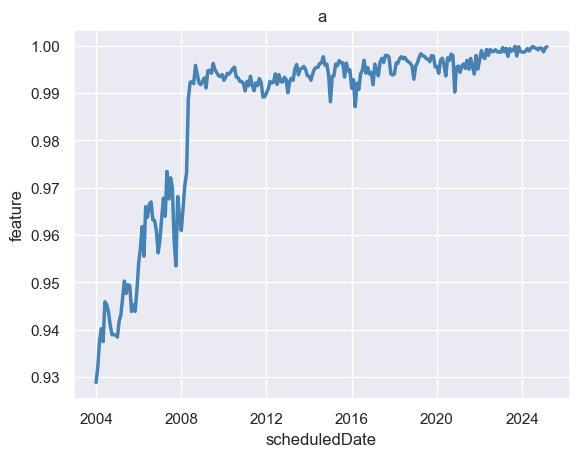

In [405]:
# want to see the distribution of the feature 'broke_match' over time (grouped monthly)as a graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_temp['scheduledDate'] = pd.to_datetime(df_temp['scheduledDate'])

df_monthly = df_temp.groupby(df_temp['scheduledDate'].dt.to_period('M'))['feature'].mean().reset_index()
df_monthly['scheduledDate'] = df_monthly['scheduledDate'].dt.to_timestamp()
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_monthly, x='scheduledDate', y='feature', linewidth=2.5, color='steelblue')
plt.title(test_terms[0])

In [304]:
df_temp[df_temp['feature'] == 1][['stewardsCommentsLong', 'scheduledDate']].head(60).to_csv('stewards_comments_long_with_feature.csv', index=False)

In [ ]:
def get_cv_for_term(df, col_analysis):
    # Group by year and month, then count occurrences
    monthly_counts = df.groupby('year_month')[col_analysis].sum().reset_index()

    # Calculate mean and standard deviation
    mean_count = monthly_counts[col_analysis].mean()
    std_count = monthly_counts[col_analysis].std()

    # Calculate Coefficient of Variation
    cv = std_count / mean_count if mean_count != 0 else float('inf')
    num_comments = df[df[col_analysis] == 1].shape[0]
    last_12_months = df[df['scheduledDate'] >= pd.to_datetime('2024-05-01')]
    last_12_months_comments = last_12_months[last_12_months[col_analysis] == 1].shape[0]
    mean_annual_comments = df[df[col_analysis] == 1].shape[0] / 20
    ratio_last_12_months = last_12_months_comments / mean_annual_comments

    print(f"Term: '{term}' | CV: {cv:.2f} | Std: {std_count:.2f} | Num Comments: {num_comments} | Ratio Last 12 Months: {ratio_last_12_months:.2f}")
    return cv, std_count, num_comments, ratio_last_12_months

list_terms = higher_count_words
results = []

df_temp['year_month'] = df_temp['scheduledDate'].dt.to_period('Y')
# df_analysis = df_temp[df_temp['scheduledDate'] >= pd.to_datetime('2009-01-01')].copy()

for term in list_terms:
    df_analysis['temp_analysis'] = df_analysis['stewardsCommentsLong'].apply(
        fuzzy_any_match, terms=[term], threshold=THRESHOLD
    )
    cv, std, num_comments, ratio_last_12_months = get_cv_for_term(df_analysis, col_analysis='temp_analysis')
    results.append({'term': term, 
                    'cv': cv, 
                    'std': std, 
                    'num_comments': num_comments, 
                    'ratio_last_12_months': ratio_last_12_months}) # over 1 means more than average annual comments in the last 12 months


In [18]:
import pandas as pd

file_path = '/Users/rorypearson/Desktop/harness_db/final_harness_master_stewards_lookup_table.csv'

df_lookup = pd.read_csv(file_path)

df_lookup.head()

,ID,MAJOR CATEGORY,SUB-CATEGORY,INDIVIDUAL COMMENT,COUNT (1),SUM
0,1,Start and early race,Score up issue,raced roughly in score up,3696,NaN
1,2,Start and early race,Score up issue,hung out score-up,3600,NaN
2,3,Start and early race,Score up issue,hung in score up,3285,NaN
3,4,Start and early race,Score up issue,pulled hard in score-up,2656,NaN
4,5,Start and early race,Score up issue,fractious in score-up,1959,NaN


In [19]:
df_lookup['MAJOR CATEGORY'] = df_lookup['MAJOR CATEGORY'].apply(lambda x: x.lower().strip().replace(' ', '_'))
df_lookup['SUB-CATEGORY'] = df_lookup['SUB-CATEGORY'].apply(lambda x: x.lower().strip().replace(' ', '_'))

df_lookup.head()

,ID,MAJOR CATEGORY,SUB-CATEGORY,INDIVIDUAL COMMENT,COUNT (1),SUM
0,1,start_and_early_race,score_up_issue,raced roughly in score up,3696,NaN
1,2,start_and_early_race,score_up_issue,hung out score-up,3600,NaN
2,3,start_and_early_race,score_up_issue,hung in score up,3285,NaN
3,4,start_and_early_race,score_up_issue,pulled hard in score-up,2656,NaN
4,5,start_and_early_race,score_up_issue,fractious in score-up,1959,NaN


In [185]:
def fuzzy_match_all_terms_with_lookup(text, terms=None, threshold=THRESHOLD, lookup_dict=None):
    if terms is None or lookup_dict is None:
        return False
    
    text = str(text).lower()

    matched_subcategories = {
        lookup_dict[term].replace(' ', '_'): 1
        for term in terms
        if fuzz.partial_ratio(term, text) >= threshold
    }
    return matched_subcategories

# take just the first 10000 rows
# df_analysis = df_temp.head(10)

term_to_subcategory_mapping = dict(zip(df_lookup['INDIVIDUAL COMMENT'].str.lower().replace(',', ''), df_lookup['SUB-CATEGORY']))
terms = list(term_to_subcategory_mapping.keys())

df_temp['clustered_features'] = df_temp['stewardsCommentsLong'].apply(fuzzy_match_all_terms_with_lookup, 
                                                                      terms=terms, 
                                                                      threshold=100,
                                                                      lookup_dict=term_to_subcategory_mapping)

df_temp.rename(columns={'clustered_features': 'long_stew_clustered_features'}, inplace=True)
# should take about 60 mins to run

In [189]:
df_temp.head(20)[['stewardsCommentsLong', 'stewardsCommentsShort', 'long_stew_unclustered_features', 'long_stew_clustered_features']]

,stewardsCommentsLong,stewardsCommentsShort,long_stew_unclustered_features,long_stew_clustered_features,long_stew_clustered_features
3397706,NaN,NaN,,,{}
3397580,NaN,NaN,,,{}
3397656,qualified mobiles,QM,,,{}
3397716,"800m, 7 back on the pegs, 400m, 1 out 5 back",800 13 400 12,,,"{'bell_and_800_fence_and_long_way_back': 1, '4..."
3397560,"pre race blood test, 800m, 5 back on the pegs,...",PRBT 800 9 400 7,pre_race_blood_test,,"{'bell_and_800_fence_and_5_or_6_back': 1, '400..."
3397659,"800m, tailed off, 400m, 8 back on the pegs",800 17 400 15,led,,"{'up_close_early': 1, '400_disadvantaged': 1}"
3397642,"800m, 4 back on the pegs, 400m, 3 back on pegs",800 7 400 5,,400_fence_and_up_close,"{'bell_and_800_fence_and_3_or_4_back': 1, '400..."
3397915,"overraced, warning issued, gave ground, query ...",OV WI GG QUERP VXAR NAR (L) 800 5 400 2,warning_issued|last|outside_leader|no_abnormal...,raced_ungenerously_not_early,"{'raced_ungenerously_not_early': 1, 'mild_poor..."
3397956,"worked forward, led, swabbed, 800m, leader, 40...",WF L SWAB 800 1 400 1,led|swabbed|worked_forward,forward,"{'up_close_early': 1, 'forward': 1, 'bell_and_..."
3398009,"gate speed, led, Surrendered lead early, 800m,...",GS L SLE 800 3 400 3,gate_speed|led|surrendered_lead_early,showed_early_speed,"{'showed_early_speed': 1, 'up_close_early': 1,..."


In [188]:
race_code = 'PCM31052505'
horseId = '851869C7C49036D1E055005E00000019'
df_temp[(df_temp['raceCode'] == race_code) & (df_temp['horseId'] == horseId)][['stewardsCommentsLong', 'stewardsCommentsShort', 'long_stew_unclustered_features', 'long_stew_clustered_features']]

,stewardsCommentsLong,stewardsCommentsShort,long_stew_unclustered_features,long_stew_clustered_features,long_stew_clustered_features
3397940,"restrained after start, 800m, 1 out 1 back, 40...",RAS 800 4 400 W1,restrained_after_start,,"{'slow_start_restrained': 1, 'bell_and_800_and..."


In [194]:
# delete 
df_analysis = df_temp.copy()

In [195]:
import numpy as np

# ✅ Precise fix: use .iloc and np.delete to drop by position only
df_analysis = df_analysis.iloc[:, np.delete(np.arange(df_analysis.shape[1]), -2)]
df_analysis.head()

,club,clubId,dayNightTwilight,driversAvailableTime,featureRaceText,meetingClass,meetingCode,meetingStage,meetingStatus,numberOfRaces,...,trainerDOB,trainerGender,trainerId,trainerName,trainerTitle,trotterInPacersRace,bsp,preplay_last_price_taken,long_stew_unclustered_features,long_stew_clustered_features
3397706,West Wyalong,851869BDE86036D1E055005E00000019,D,2025-05-29 00:30:00+00:00,NaN,QUALIFYING TRIAL,WE310525,RESULTS,PLANNED,1.0,...,1981-04-26,M,851869BF594D36D1E055005E00000019,Rodney Lemon,Mr,False,NaN,NaN,,{}
3397580,West Wyalong,851869BDE86036D1E055005E00000019,D,2025-05-29 00:30:00+00:00,NaN,QUALIFYING TRIAL,WE310525,RESULTS,PLANNED,1.0,...,1981-04-26,M,851869BF594D36D1E055005E00000019,Rodney Lemon,Mr,False,NaN,NaN,,{}
3397656,West Wyalong,851869BDE86036D1E055005E00000019,D,2025-05-29 00:30:00+00:00,NaN,QUALIFYING TRIAL,WE310525,RESULTS,PLANNED,1.0,...,1984-06-16,M,851869C1721536D1E055005E00000019,Trent Pilon,Mr,False,NaN,NaN,,{}
3397716,Nswhrc,851869BBC3C036D1E055005E00000019,N,2025-05-29 00:30:00+00:00,NaN,M-CLASS,PC310525,RESULTS,COMPLETED,9.0,...,1987-05-29,M,851869BF134A36D1E055005E00000019,Rickie Alchin,Mr,False,87.9,87.9,,"{'bell_and_800_fence_and_long_way_back': 1, '4..."
3397560,Nswhrc,851869BBC3C036D1E055005E00000019,N,2025-05-29 00:30:00+00:00,NaN,M-CLASS,PC310525,RESULTS,COMPLETED,9.0,...,1950-09-09,M,851869BDDECB36D1E055005E00000019,Michael Teuma,Mr,False,650.0,650.0,pre_race_blood_test,"{'bell_and_800_fence_and_5_or_6_back': 1, '400..."


In [191]:
df_temp.head()

,club,clubId,dayNightTwilight,driversAvailableTime,featureRaceText,meetingClass,meetingCode,meetingStage,meetingStatus,numberOfRaces,...,trainerGender,trainerId,trainerName,trainerTitle,trotterInPacersRace,bsp,preplay_last_price_taken,long_stew_unclustered_features,long_stew_clustered_features,long_stew_clustered_features
3397706,West Wyalong,851869BDE86036D1E055005E00000019,D,2025-05-29 00:30:00+00:00,NaN,QUALIFYING TRIAL,WE310525,RESULTS,PLANNED,1.0,...,M,851869BF594D36D1E055005E00000019,Rodney Lemon,Mr,False,NaN,NaN,,,{}
3397580,West Wyalong,851869BDE86036D1E055005E00000019,D,2025-05-29 00:30:00+00:00,NaN,QUALIFYING TRIAL,WE310525,RESULTS,PLANNED,1.0,...,M,851869BF594D36D1E055005E00000019,Rodney Lemon,Mr,False,NaN,NaN,,,{}
3397656,West Wyalong,851869BDE86036D1E055005E00000019,D,2025-05-29 00:30:00+00:00,NaN,QUALIFYING TRIAL,WE310525,RESULTS,PLANNED,1.0,...,M,851869C1721536D1E055005E00000019,Trent Pilon,Mr,False,NaN,NaN,,,{}
3397716,Nswhrc,851869BBC3C036D1E055005E00000019,N,2025-05-29 00:30:00+00:00,NaN,M-CLASS,PC310525,RESULTS,COMPLETED,9.0,...,M,851869BF134A36D1E055005E00000019,Rickie Alchin,Mr,False,87.9,87.9,,,"{'bell_and_800_fence_and_long_way_back': 1, '4..."
3397560,Nswhrc,851869BBC3C036D1E055005E00000019,N,2025-05-29 00:30:00+00:00,NaN,M-CLASS,PC310525,RESULTS,COMPLETED,9.0,...,M,851869BDDECB36D1E055005E00000019,Michael Teuma,Mr,False,650.0,650.0,pre_race_blood_test,,"{'bell_and_800_fence_and_5_or_6_back': 1, '400..."


In [78]:
df_temp['stewardsCommentsLong'].head(2)

0                        Tire, Behind leader at the bell
364    broke in score up, out of position at start, o...
Name: stewardsCommentsLong, dtype: object

In [1]:
# df_temp.to_csv('/Users/rorypearson/Desktop/harness_db/harness_historical_with_stew.csv', index=False)
import pandas as pd
df_temp = pd.read_csv('/Users/rorypearson/Desktop/harness_db/harness_historical_with_stew.csv')

/var/folders/tt/f70p_py12jb4_mtykrl8flth0000gn/T/ipykernel_21039/1743334744.py:3: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv('/Users/rorypearson/Desktop/harness_db/harness_historical_with_stew.csv')


In [24]:
df_temp['scheduledDate'] = pd.to_datetime(df_temp['scheduledDate'],
                                          format='mixed')

In [88]:
import ast

def safe_to_dict(val):
    if isinstance(val, str):
        try:
            parsed = ast.literal_eval(val)
            if isinstance(parsed, dict):
                return parsed
        except:
            pass
    return val

df_tim['long_stew_unclustered_features'] = df_tim['long_stew_unclustered_features'].map(safe_to_dict)
df_tim['long_stew_clustered_features'] = df_tim['long_stew_clustered_features'].map(safe_to_dict)

def post_process_stew(df_temp, col_name):
    df_temp[col_name] = df_temp[col_name].map(lambda d: '|'.join(d.keys()))
    return df_temp

df_tim = post_process_stew(df_tim, 'long_stew_unclustered_features')
df_tim = post_process_stew(df_tim, 'long_stew_clustered_features')

df_tim.to_csv('/Users/rorypearson/Desktop/harness_db/timtest.csv', index=False)

In [114]:
df_temp.to_csv('/Users/rorypearson/Desktop/harness_db/harness_historical_with_stew.csv', index=False)
# df_temp = pd.read_csv('/Users/rorypearson/Desktop/harness_db/harness_historical_with_stew.csv')

df_temp.head()

,club,clubId,dayNightTwilight,driversAvailableTime,featureRaceText,meetingClass,meetingCode,meetingStage,meetingStatus,numberOfRaces,...,trainerDOB,trainerGender,trainerId,trainerName,trainerTitle,trotterInPacersRace,bsp,preplay_last_price_taken,long_stew_unclustered_features,long_stew_clustered_features
0,St Marys,851869BBDE6F36D1E055005E00000019,D,2003-12-29 22:00:00+00:00,Country Guineas\r\nColin White Memorial\r\nSca...,C-CLASS,SM010104,RESULTS,PLANNED,7.0,...,1976-05-18 00:00:00+00:00,M,851869C0E10336D1E055005E00000019,Wayne Watson,Mr,False,NaN,NaN,{},{}
1,Echuca,851869BBB06336D1E055005E00000019,N,2003-12-30 00:00:00+00:00,NaN,C-CLASS,EC010104,RESULTS,COMPLETED,8.0,...,1969-11-10 00:00:00+00:00,M,851869BB68DE36D1E055005E00000019,Robert McCartney,Mr,False,2.3,2.3,"{'broke': 1, 'out_of_position_at_start': 1, 'b...","{'slow_start_own_fault': 1, 'broke_or_galloped..."
2,Mackay,851869BD47AF36D1E055005E00000019,D,2003-12-31 01:00:00+00:00,NaN,B-CLASS,MC010104,RESULTS,PLANNED,5.0,...,1939-06-24 00:00:00+00:00,M,851869BD39D036D1E055005E00000019,Des Weeks,Mr,False,NaN,NaN,{},{}
3,King Island,851869BBC3CC36D1E055005E00000019,D,2003-12-29 22:00:00+00:00,NaN,B-CLASS,KS010104,RESULTS,PLANNED,2.0,...,1942-09-24 00:00:00+00:00,M,851869C0C03836D1E055005E00000019,John Rhodes,Mr,False,NaN,NaN,{},{}
4,St Marys,851869BBDE6F36D1E055005E00000019,D,2003-12-29 22:00:00+00:00,Country Guineas\r\nColin White Memorial\r\nSca...,C-CLASS,SM010104,RESULTS,PLANNED,7.0,...,1932-04-22 00:00:00+00:00,M,851869C0B49736D1E055005E00000019,Brian Lewis,Mr,False,NaN,NaN,{},{}


In [115]:
df_temp[['long_stew_unclustered_features', 'long_stew_clustered_features']].tail(10)

,long_stew_unclustered_features,long_stew_clustered_features
3398002,{'restrained_after_start': 1},{}
3398003,{'4th_fence_at_bell': 1},{}
3398004,{'restrained_after_start': 1},{}
3398005,{'1_out_4_back_at_bell': 1},{}
3398006,"{'swabbed': 1, 'worked_forward': 1, 'outside_l...",{'forward': 1}
3398007,"{'1_out_4_back_at_bell': 1, '3_wide_latter': 1}",{}
3398008,"{'held_up': 1, '5_back_on_the_pegs_at_bell': 1}","{'held_up': 1, 'bell_and_800_fence_and_5_or_6_..."
3398009,"{'gate_speed': 1, 'led': 1, 'surrendered_lead_...",{'showed_early_speed': 1}
3398010,{'4_back_on_the_pegs_at_bell': 1},{'bell_and_800_fence_and_3_or_4_back': 1}
3398011,"{'1_out_2_back_at_bell': 1, '3_wide_late': 1}",{'bell_and_800_and_one_out_and_2_back': 1}


In [117]:
df_temp.drop(columns=['long_stew_clustered_features_XX', 'long_stew_unclustered_features_XX'], axis=1, inplace=True)

In [ ]:
import ast

def safe_to_dict(val):
    if isinstance(val, str):
        try:
            parsed = ast.literal_eval(val)
            if isinstance(parsed, dict):
                return parsed
        except:
            pass
    return val

# Clean the columns properly
# df_analysis['long_stew_unclustered_features'] = df_analysis['long_stew_unclustered_features'].map(safe_to_dict)
df_analysis['long_stew_clustered_features'] = df_analysis['long_stew_clustered_features'].map(safe_to_dict)

# Convert 1-column DataFrames to Series
# df_temp['long_stew_clustered_features'] = df_temp['long_stew_clustered_features'].squeeze()
# df_temp['long_stew_unclustered_features'] = df_temp['long_stew_unclustered_features'].squeeze()


def post_process_stew(df_temp, col_name):
    df_temp[col_name] = df_temp[col_name].map(
        lambda d: '|'.join(d.keys())
    )
    return df_temp

# df_analysis = post_process_stew(df_analysis, 'long_stew_unclustered_features')
df_analysis = post_process_stew(df_analysis, 'long_stew_clustered_features')

df_analysis[['long_stew_unclustered_features', 'long_stew_clustered_features']].tail(10)


,long_stew_unclustered_features,long_stew_clustered_features
277,,
290,held_up,slow_start_own_fault|held_up|draw_restrictions
384,,
240,raced_roughly|checked,mildly_checked__or_poor_drive|raced_ungenerous...
227,galloped_out,broke_at_start|broke_or_galloped_not_at_start
49,led|led_one_wide,up_close_early
9,led|led_one_wide|pulled_hard|tailed_off_at_bel...,raced_ungenerously_early|score_up_issue|up_clo...
119,,slow_start_own_fault|draw_restrictions
326,led|led_one_wide,up_close_early
376,,


In [198]:
df_analysis.to_csv('/Users/rorypearson/Desktop/harness_db/harness_historical_with_stew_post_processed.csv', index=False)

In [137]:
race_code = 'PCM31052505'
horseId = '851869C7C49036D1E055005E00000019'
df_temp[(df_temp['raceCode'] == race_code) & (df_temp['horseId'] == horseId)][['stewardsCommentsLong', 'stewardsCommentsShort', 'long_stew_unclustered_features', 'long_stew_clustered_features']]

,stewardsCommentsLong,stewardsCommentsShort,long_stew_unclustered_features,long_stew_clustered_features
3397940,"restrained after start, 800m, 1 out 1 back, 40...",RAS 800 4 400 W1,restrained_after_start,


In [127]:
df_temp.columns

Index(['club', 'clubId', 'dayNightTwilight', 'driversAvailableTime',
       'featureRaceText', 'meetingClass', 'meetingCode', 'meetingStage',
       'meetingStatus', 'numberOfRaces', 'scheduledDate', 'state', 'tab',
       'track', 'trackId', 'trials', 'ageRestriction', 'ageSexDescription',
       'alsoEligible', 'barrierDrawType', 'claim', 'claimRestrictionText',
       'discretionaryHandicap', 'distance', 'fieldSize', 'gaitRace',
       'leadTime', 'marginFirstToSecond', 'marginSecondToThird', 'mileRate',
       'monte', 'raceName', 'nameShort', 'notes', 'overallTime',
       'plannedStartTimestamp', 'prizemoneyPositions', 'quarter1', 'quarter2',
       'quarter3', 'quarter4', 'raceClass', 'raceClassRestriction', 'raceCode',
       'raceNumber', 'raceStatus', 'stakes', 'startType', 'trackCondition',
       'age', 'barrier', 'beatenMargin', 'breeder', 'breederId',
       'broodmareSireId', 'broodmareSireName', 'claimingPrice', 'colour',
       'damId', 'damName', 'deadHeatFlag', 'driv

Getting unclustered features into dictionary

In [96]:
# this will take a while to run... 
higher_count_words = list(df_long_word_counts[df_long_word_counts['count'] > 5000]['word'])

# of the top frequency words, these we hate
no_longer_relevant = [
    'division 2', # 0 mentions in the last 12 months
    'division 1', # 0 mentions in the last 12 months
    '0 lifetime wins', # 0 mentions in the last 12 months
    'change of tactics', # 0 mentions in the last 12 months
    
    'broke ', # duplicate
    
    # significant dropoff
    'tired badly', # would need to be clustered with other tired terms
    'performed poorly', # would need to be clustered with other terms
    'bell lap, three wide without cover', # tactic improvements? 
    'began badly', # needs clustering
    'showed gate speed', # needs clustering
    'last chance in draw', # needs clustering
]

# remove these from the lists
higher_count_words = [word for word in higher_count_words if word not in no_longer_relevant]

print(f'Processing {len(higher_count_words)} terms into a feature dictionary.. Last run took 8mins with 111 terms')
df_temp['long_stew_unclustered_features'] = df_temp['stewardsCommentsLong'].apply(fuzzy_match_all_terms, 
                                                                                  terms=higher_count_words, 
                                                                                  threshold=99)

Processing 114 terms into a feature dictionary.. Last run took 8mins with 111 terms


In [68]:
x = df_analysis['long_stew_unclustered_features'].iloc[1]
x

{'broke': 1, 'out_of_position_at_start': 1}

In [71]:
df_temp['long_stew_unclustered_features'].tail(50).to_csv('/Users/rorypearson/Desktop/harness_db/test.csv', index=False)

In [396]:
df_results = pd.DataFrame(results)
df_results.head(20)

,term,cv,std,num_comments,ratio_last_12_months
0,gate speed,0.198181,6514.599369,558823,1.123003
1,led,0.200633,5433.764435,460412,1.224773
2,restrained after start,0.219001,3513.975262,272773,1.290817
3,warning issued,0.264531,1162.269749,74693,1.352469
4,broke,0.203173,1814.362625,151812,1.131136
5,vets examination after race,0.305214,1077.889840,60037,1.319187
6,swabbed,0.277596,2506.135521,153476,1.194975
7,last,0.202234,1489.894637,125242,1.056036
8,pre race swab,0.249881,2618.795506,178163,0.911413
9,out of position at start,0.231870,732.653442,53716,1.192196


In [399]:
df_results['term'] = df_results['term'].apply(lambda x: x.lower().strip())

df_results[(df_results['ratio_last_12_months'] > 1.5) 
           & ~(df_results['term'].isin(no_longer_relevant))].sort_values(by='ratio_last_12_months', ascending=False)

,term,cv,std,num_comments,ratio_last_12_months
71,no abnormalities reported,0.930273,652.942463,11932,2.976869
11,worked forward,0.811000,4220.108145,88461,2.899357
44,caught wide early,0.639231,1321.515226,35145,2.256936
72,overraced,0.744492,872.632789,19926,2.070661
59,obtained trail early,0.494992,1099.784367,37771,1.953350
61,restrained to rear,0.407335,1061.156673,44287,1.908461
97,shifted out,0.233541,260.068995,18931,1.775923
120,hung in under pressure,0.297432,175.764925,10046,1.749950
37,held up early,0.297412,820.980744,46927,1.683040
15,hung in,0.270636,754.422466,47389,1.573783


In [72]:
# df_temp['state'] = df_temp['state'].apply(lambda x: x.lower().strip())
# df_temp['track'] = df_temp['track'].apply(lambda x: x.lower().strip())

track_update_dict = {
    'tabcorp pk menangle': 'menangle',
    'globe derby park': 'globe derby',
    'lockyer (gatton)': 'gatton',
    'central wheatbelt': 'kellerberrin',
    'riverina paceway': 'wagga',
}

df_temp['track'] = df_temp['track'].replace(track_update_dict)

In [21]:
sorted_dict = {key: track_distance_dict[key] for key in sorted(track_distance_dict)}

print(sorted_dict)

{'albany': [400.0, 1826.0, 1828.0, 1832.0, 2150.0, 2242.0, 2243.0, 2247.0, 2252.0, 2258.0, 2265.0, 2643.0, 2648.0, 2683.0, 2690.0, 3078.0, 3113.0], 'albion park': [1119.0, 1609.0, 1628.0, 1660.0, 2138.0, 2647.0, 2680.0, 3157.0], 'albury': [1750.0, 1770.0, 2150.0, 2170.0, 2550.0, 2555.0, 2570.0, 2950.0, 2970.0], 'ararat': [1790.0, 2165.0, 2190.0, 2195.0, 2570.0, 2590.0, 2975.0], 'armidale': [1609.0, 1980.0, 2360.0], 'bacchus marsh': [1750.0, 2140.0, 2552.0], 'ballarat': [1200.0, 1609.0, 1710.0, 2200.0, 2710.0], 'bankstown': [1305.0, 1335.0, 1740.0, 2140.0, 2160.0, 2540.0], 'bathurst': [1195.0, 1200.0, 1609.0, 1730.0, 1740.0, 2130.0, 2260.0, 2360.0, 2520.0, 2535.0, 2790.0, 2795.0], 'beaudesert': [1609.0], 'benalla': [1830.0, 2280.0], 'bendigo': [1150.0, 1515.0, 1609.0, 1650.0, 1965.0, 2150.0, 2415.0, 2650.0, 2865.0], 'birchip': [1750.0, 2150.0, 2550.0], 'blayney': [1640.0, 2000.0, 2400.0], 'boonah': [1609.0], 'boort': [1900.0, 1950.0, 2250.0, 2600.0, 2612.0], 'bridgetown': [1784.0, 2190.